## **Analysis of World Economic Trends**  
_A deep dive into global economic patterns, insights, and projections._

---



### **Table of Contents**  
1. [Introduction](#-introduction)  
2. [Data Overview](#-data-overview)  
3. [Data Preprocessing](#-data-preprocessing)  
4. [Exploratory Data Analysis](#-exploratory-data-analysis)  
    - [Economic Growth](#-economic-growth)  
    - [Inflation Trends](#-inflation-trends)  
    - [Trade and Agriculture](#-trade-and-agriculture)  
5. [Model Building and Forecasting](#-model-building-and-forecasting)  
6. [Key Insights](#-key-insights)  
7. [References](#-references)




### **Introduction**  
_What drives global economies? This analysis explores key economic trends, offering insights into growth, inflation, and trade patterns._  

- **Objective:** Understand and analyze global economic trends.  
- **Data Sources:** Mention datasets and their sources (e.g., World Bank, IMF).  
- **Scope:** Highlight the scope and potential applications of the analysis.




### **Data Overview**  
_An overview of the datasets used in the analysis._  



- **Dataset Details:**  
  | Feature | Description |  
  |---------|-------------|  
  | `Year` | Year of observation. |  
  | `GDP` | Gross Domestic Product. |  
  | `Inflation` | Annual inflation rate. |  
  | `Trade` | Trade volume and balance. |  

- **Summary Statistics:** _Showcase basic data stats like mean, median, and distribution._



In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the excel file
data = pd.ExcelFile('WorldBank.xlsx')

# Display sheet names to understand the structure of the file
data.sheet_names


['Development Indicators']

In [3]:
# Ensuring we load the worksheet we need "Development Indicators" sheet
df = data.parse('Development Indicators')

# Display the first few rows and the column names to understand the data structure
df.head(), df.columns


(  Country Name Country Code      Region IncomeGroup  Year  \
 0  Afghanistan          AFG  South Asia  Low income  2018   
 1  Afghanistan          AFG  South Asia  Low income  2017   
 2  Afghanistan          AFG  South Asia  Low income  2016   
 3  Afghanistan          AFG  South Asia  Low income  2015   
 4  Afghanistan          AFG  South Asia  Low income  2014   
 
    Birth rate, crude (per 1,000 people)  Death rate, crude (per 1,000 people)  \
 0                                   NaN                                   NaN   
 1                                33.211                                 6.575   
 2                                33.981                                 6.742   
 3                                34.809                                 6.929   
 4                                35.706                                 7.141   
 
    Electric power consumption (kWh per capita)     GDP (USD)  \
 0                                          NaN  1.936300e+10   
 1

Optimize column names for better readability

In [4]:
df_ = pd.DataFrame(df)

# Dictionary mapping original column names to optimized names
column_mapping = {
    'Country Name': 'country_name',
    'Country Code': 'country_code',
    'Region': 'region',
    'IncomeGroup': 'income_group',
    'Year': 'year',
    'Birth rate, crude (per 1,000 people)': 'crude_birth_rate',
    'Death rate, crude (per 1,000 people)': 'crude_death_rate',
    'Electric power consumption (kWh per capita)': 'electricity_consumption_per_capita',
    'GDP (USD)': 'gdp',
    'GDP per capita (USD)': 'gdp_per_capita',
    'Individuals using the Internet (% of population)': 'internet_users_percent',
    'Infant mortality rate (per 1,000 live births)': 'infant_mortality_rate',
    'Life expectancy at birth (years)': 'life_expectancy',
    'Population density (people per sq. km of land area)': 'population_density',
    'Unemployment (% of total labor force) (modeled ILO estimate)': 'unemployment_rate_ilo_estimate'
}

# Rename the columns in the DataFrame
df_ = df_.rename(columns=column_mapping)

# Display the new column names
print("Optimized column names:")
print(df_.columns.tolist())

Optimized column names:
['country_name', 'country_code', 'region', 'income_group', 'year', 'crude_birth_rate', 'crude_death_rate', 'electricity_consumption_per_capita', 'gdp', 'gdp_per_capita', 'internet_users_percent', 'infant_mortality_rate', 'life_expectancy', 'population_density', 'unemployment_rate_ilo_estimate']


**Observations:**

- The dataset contains multiple years of data for each country. Population needs to be calculated using the formula: 

Population (millions) = GDP (USD) / GDP per capita (USD) ÷1,000,000
 
Next, I will calculate the Population (millions) column and clean the dataset for further analysis.

In [5]:
# Calculate the population in millions and add it as a new column
df_['population'] = (df_['gdp'] / df_['gdp_per_capita']) / 1e6

# Check for missing or anomalous data
missing_summary = df_.isnull().sum()



In [6]:
# Display the dataset structure after adding population and missing data summary
display(df_.head()), missing_summary


,country_name,country_code,region,income_group,year,crude_birth_rate,crude_death_rate,electricity_consumption_per_capita,gdp,gdp_per_capita,internet_users_percent,infant_mortality_rate,life_expectancy,population_density,unemployment_rate_ilo_estimate,population
0,Afghanistan,AFG,South Asia,Low income,2018,NaN,NaN,NaN,1.936300e+10,520.897,NaN,47.9,NaN,56.9378,1.542,37.172416
1,Afghanistan,AFG,South Asia,Low income,2017,33.211,6.575,NaN,2.019180e+10,556.302,13.50,49.5,64.130,55.5960,1.559,36.296472
2,Afghanistan,AFG,South Asia,Low income,2016,33.981,6.742,NaN,1.936260e+10,547.228,11.20,51.2,63.763,54.1971,1.634,35.383058
3,Afghanistan,AFG,South Asia,Low income,2015,34.809,6.929,NaN,1.990710e+10,578.466,8.26,53.1,63.377,52.7121,1.679,34.413604
4,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,7.00,55.1,62.966,51.1148,1.735,33.370856


(None,
 country_name                             0
 country_code                             0
 region                                   0
 income_group                             0
 year                                     0
 crude_birth_rate                      1009
 crude_death_rate                      1033
 electricity_consumption_per_capita    6601
 gdp                                   2871
 gdp_per_capita                        2874
 internet_users_percent                7385
 infant_mortality_rate                 2465
 life_expectancy                       1273
 population_density                     604
 unemployment_rate_ilo_estimate        7241
 population                            2874
 dtype: int64)

**Missing Data Summary**

Significant gaps exist in the following indicators:

- Electric power consumption: 6,601 missing values.
- Individuals using the Internet: 7,385 missing values.
- gdp per capita: 2,874 missing values, leading to corresponding missing values in Population (millions).

In [7]:
# Find the minimum value in the `Year` column
min_year = df_['year'].min()

# Find the maximum value in the `Year` column
max_year = df_['year'].max()

# Print the minimum and maximum year
print(f"The year range of the data is: {min_year} to {max_year}")

The year range of the data is: 1960 to 2018


C:\Users\SinoZwane\AppData\Local\Temp\ipykernel_9740\539949250.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_data_by_year = df_.groupby('year').apply(lambda x: x.isnull().mean())


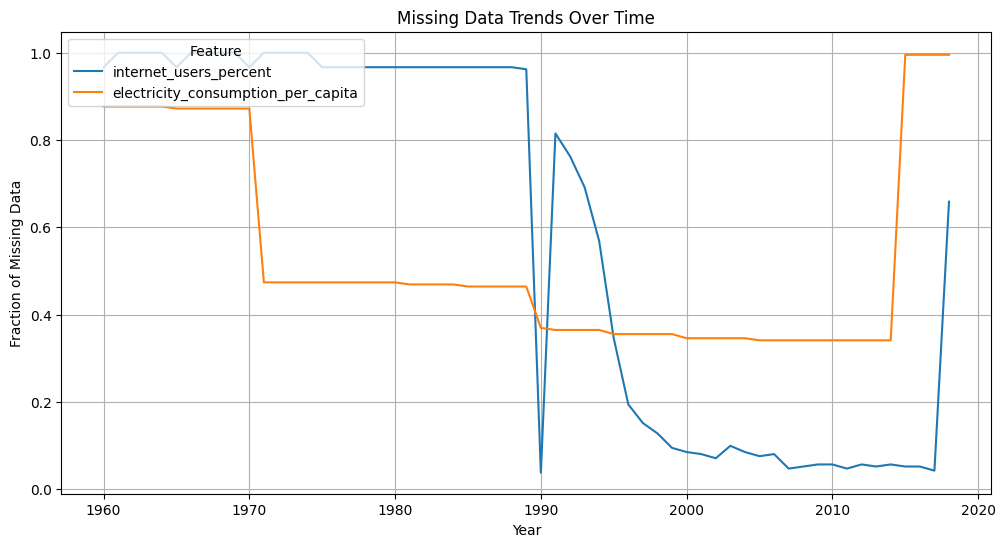

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a missing data percentage by year
missing_data_by_year = df_.groupby('year').apply(lambda x: x.isnull().mean())

# Plot the trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=missing_data_by_year[['internet_users_percent', 
                                        'electricity_consumption_per_capita']],
             dashes=False)
plt.title('Missing Data Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Fraction of Missing Data')
plt.grid(True)
plt.legend(title='Feature', loc='upper left')
plt.show()


**Observations from the Chart:**

Internet Usage (% of Population):

Almost no data exists before 1990, which aligns with the lack of widespread internet adoption during that time.
After 1990, the missing data decreases significantly, reflecting improved global reporting and adoption rates.
A spike in missing data closer to 2020 may indicate incomplete or pending data for recent years.
Electric Power Consumption (kWh per Capita):

Nearly all data is missing prior to the 1970s, suggesting either lack of measurement or documentation in earlier years.
From the mid-1970s onward, missing data decreases significantly, likely due to better reporting infrastructure.
Towards the end of the timeframe, the percentage of missing data rises sharply again, possibly due to gaps in recent reporting.

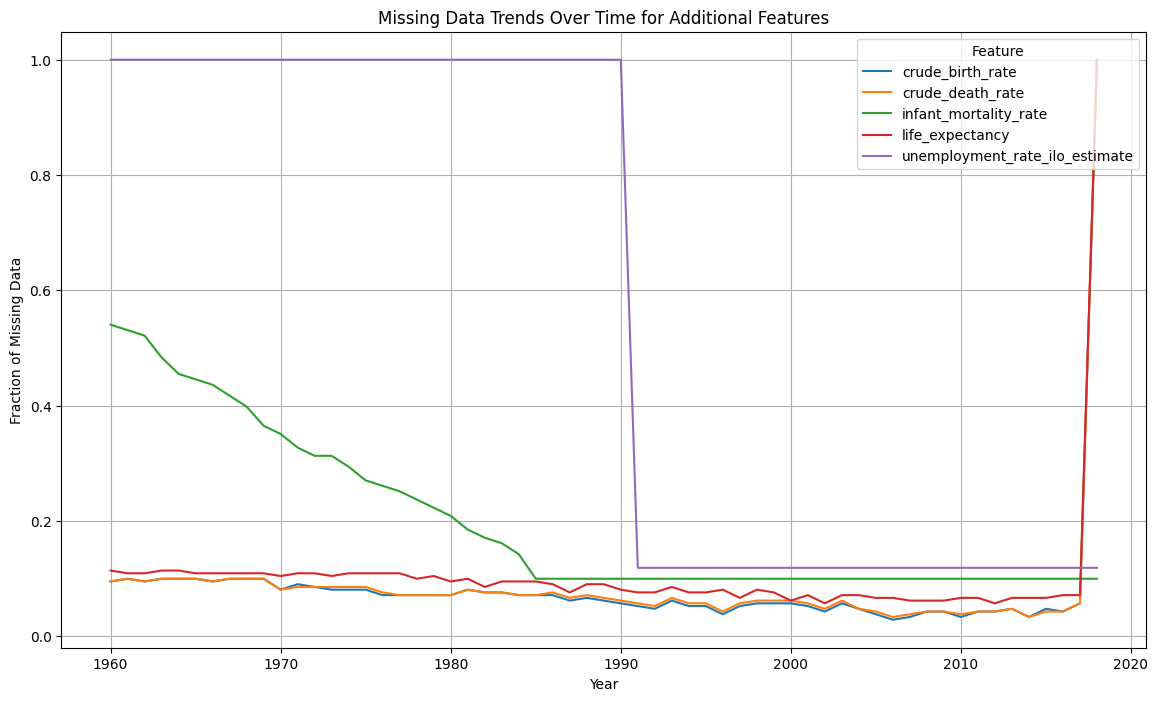

In [16]:
# Columns to assess
additional_features = [
    'crude_birth_rate', 
    'crude_death_rate',
    'infant_mortality_rate',
    'life_expectancy',
    'unemployment_rate_ilo_estimate'
]

# Calculate missing data fraction by year for these features
missing_data_trends = df_.groupby('year')[additional_features].apply(lambda x: x.isnull().mean())

# Plot missing data trends
plt.figure(figsize=(14, 8))
for column in additional_features:
    sns.lineplot(data=missing_data_trends[column], label=column)

plt.title('Missing Data Trends Over Time for Additional Features')
plt.xlabel('Year')
plt.ylabel('Fraction of Missing Data')
plt.legend(title='Feature', loc='upper right')
plt.grid(True)
plt.show()


In [20]:
df_.columns

Index(['country_name', 'country_code', 'region', 'income_group', 'year',
       'crude_birth_rate', 'crude_death_rate',
       'electricity_consumption_per_capita', 'gdp', 'gdp_per_capita',
       'internet_users_percent', 'infant_mortality_rate', 'life_expectancy',
       'population_density', 'unemployment_rate_ilo_estimate', 'population'],
      dtype='object')

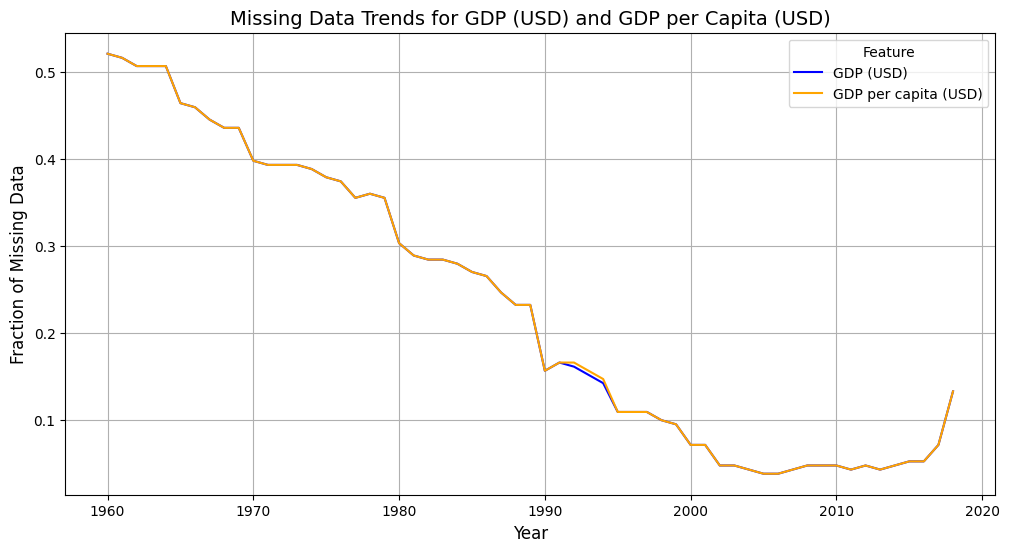

In [22]:
# Extract missing value trends for GDP and GDP per capita
gdp_missing = df_.groupby('year')['gdp'].apply(lambda x: x.isna().mean())
gdp_per_capita_missing = df_.groupby('year')['gdp_per_capita'].apply(lambda x: x.isna().mean())

# Plot the trends
plt.figure(figsize=(12, 6))
plt.plot(gdp_missing, label='GDP (USD)', color='blue')
plt.plot(gdp_per_capita_missing, label='GDP per capita (USD)', color='orange')
plt.title('Missing Data Trends for GDP (USD) and GDP per Capita (USD)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Fraction of Missing Data', fontsize=12)
plt.legend(title='Feature')
plt.grid(True)
plt.show()


### **Data Preprocessing**  
_Steps to clean and prepare the data._  

- Handling missing values.  
- Scaling and normalization techniques.  
- Data transformation or feature engineering.  



In [23]:
# Drop rows where GDP or GDP per capita (critical columns) are missing
cleaned_df = df_.dropna(subset=['gdp', 'gdp_per_capita'])

# Recalculate Population (millions) after cleaning
cleaned_df.loc[:, 'population'] = (cleaned_df['gdp'] / cleaned_df['gdp_per_capita']) / 1e6

# Inspect the cleaned data
print("Shape of the cleaned dataset:", cleaned_df.shape)
display(cleaned_df.head())


Shape of the cleaned dataset: (9575, 16)


,country_name,country_code,region,income_group,year,crude_birth_rate,crude_death_rate,electricity_consumption_per_capita,gdp,gdp_per_capita,internet_users_percent,infant_mortality_rate,life_expectancy,population_density,unemployment_rate_ilo_estimate,population
0,Afghanistan,AFG,South Asia,Low income,2018,NaN,NaN,NaN,1.936300e+10,520.897,NaN,47.9,NaN,56.9378,1.542,37.172416
1,Afghanistan,AFG,South Asia,Low income,2017,33.211,6.575,NaN,2.019180e+10,556.302,13.50,49.5,64.130,55.5960,1.559,36.296472
2,Afghanistan,AFG,South Asia,Low income,2016,33.981,6.742,NaN,1.936260e+10,547.228,11.20,51.2,63.763,54.1971,1.634,35.383058
3,Afghanistan,AFG,South Asia,Low income,2015,34.809,6.929,NaN,1.990710e+10,578.466,8.26,53.1,63.377,52.7121,1.679,34.413604
4,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,7.00,55.1,62.966,51.1148,1.735,33.370856


In [24]:
# Dropping rows with missing values for Birth Rate, Death Rate, and Life Expectancy
cleaned_df = cleaned_df.dropna(subset=[
    'crude_birth_rate',
    'crude_death_rate',
    'life_expectancy'
])

# Applying linear interpolation for Unemployment and Infant Mortality Rate
cleaned_df['unemployment_rate_ilo_estimate'] = cleaned_df[
    'unemployment_rate_ilo_estimate'].interpolate()

cleaned_df['infant_mortality_rate'] = cleaned_df[
    'infant_mortality_rate'].interpolate()

# Displaying the first few rows to confirm cleaning
cleaned_df.head()


,country_name,country_code,region,income_group,year,crude_birth_rate,crude_death_rate,electricity_consumption_per_capita,gdp,gdp_per_capita,internet_users_percent,infant_mortality_rate,life_expectancy,population_density,unemployment_rate_ilo_estimate,population
1,Afghanistan,AFG,South Asia,Low income,2017,33.211,6.575,NaN,2.019180e+10,556.302,13.50,49.5,64.130,55.5960,1.559,36.296472
2,Afghanistan,AFG,South Asia,Low income,2016,33.981,6.742,NaN,1.936260e+10,547.228,11.20,51.2,63.763,54.1971,1.634,35.383058
3,Afghanistan,AFG,South Asia,Low income,2015,34.809,6.929,NaN,1.990710e+10,578.466,8.26,53.1,63.377,52.7121,1.679,34.413604
4,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,7.00,55.1,62.966,51.1148,1.735,33.370856
5,Afghanistan,AFG,South Asia,Low income,2013,36.670,7.380,NaN,2.056110e+10,637.165,5.90,57.3,62.525,49.4280,1.725,32.269663


**Era-Specific Imputation for Internet Usage:**

- For years prior to 1990, it’s reasonable to impute zeros for internet usage.
- Post-1990, imputation can rely on averages grouped by income level.

**Era-Specific Imputation for Electric Power Consumption:**

- For years prior to the 1970s, imputing zeros makes sense, reflecting the lack of available data rather than actual consumption.
- Post-1970, imputing missing values using regional averages ensures consistency.

In [25]:
# Handle Internet Usage: Assume no data before 1990, as the internet wasn't widespread
cleaned_df['internet_users_percent'] = cleaned_df.apply(
    lambda row: 0 if row['year'] < 1990 else row['internet_users_percent'], axis=1
)

# Impute remaining Internet Usage data post-1990 with income group means
cleaned_df['internet_users_percent'] = cleaned_df.groupby('income_group')[
    'internet_users_percent'
].transform(lambda x: x.fillna(x.mean()))

# Handle Electric Power Consumption: Use zeros before 1960 (early industrialization periods)
cleaned_df['electricity_consumption_per_capita'] = cleaned_df.apply(
    lambda row: 0 if row['year'] < 1960 else row['electricity_consumption_per_capita'], axis=1
)

# Fill post-1960 missing values with regional means
cleaned_df['electricity_consumption_per_capita'] = cleaned_df.groupby('region')[
    'electricity_consumption_per_capita'
].transform(lambda x: x.fillna(x.mean()))


In [26]:
cleaned_df.head()

,country_name,country_code,region,income_group,year,crude_birth_rate,crude_death_rate,electricity_consumption_per_capita,gdp,gdp_per_capita,internet_users_percent,infant_mortality_rate,life_expectancy,population_density,unemployment_rate_ilo_estimate,population
1,Afghanistan,AFG,South Asia,Low income,2017,33.211,6.575,199.284776,2.019180e+10,556.302,13.50,49.5,64.130,55.5960,1.559,36.296472
2,Afghanistan,AFG,South Asia,Low income,2016,33.981,6.742,199.284776,1.936260e+10,547.228,11.20,51.2,63.763,54.1971,1.634,35.383058
3,Afghanistan,AFG,South Asia,Low income,2015,34.809,6.929,199.284776,1.990710e+10,578.466,8.26,53.1,63.377,52.7121,1.679,34.413604
4,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,199.284776,2.048490e+10,613.856,7.00,55.1,62.966,51.1148,1.735,33.370856
5,Afghanistan,AFG,South Asia,Low income,2013,36.670,7.380,199.284776,2.056110e+10,637.165,5.90,57.3,62.525,49.4280,1.725,32.269663


In [27]:
# Drop rows where 'Population density (people per sq. km of land area)' has missing values
final_cleaned_df = cleaned_df.dropna(subset=['population_density'])

# Verify that no missing values remain in this column
remaining_missing_values = final_cleaned_df.isnull().sum()

# Summary of the cleaned data
final_cleaned_df_info = final_cleaned_df.info()

remaining_missing_values, final_cleaned_df_info


<class 'pandas.core.frame.DataFrame'>
Index: 8697 entries, 1 to 12447
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   country_name                        8697 non-null   object 
 1   country_code                        8697 non-null   object 
 2   region                              8697 non-null   object 
 3   income_group                        8697 non-null   object 
 4   year                                8697 non-null   int64  
 5   crude_birth_rate                    8697 non-null   float64
 6   crude_death_rate                    8697 non-null   float64
 7   electricity_consumption_per_capita  8697 non-null   float64
 8   gdp                                 8697 non-null   float64
 9   gdp_per_capita                      8697 non-null   float64
 10  internet_users_percent              8697 non-null   float64
 11  infant_mortality_rate               8697 non-nu

(country_name                          0
 country_code                          0
 region                                0
 income_group                          0
 year                                  0
 crude_birth_rate                      0
 crude_death_rate                      0
 electricity_consumption_per_capita    0
 gdp                                   0
 gdp_per_capita                        0
 internet_users_percent                0
 infant_mortality_rate                 0
 life_expectancy                       0
 population_density                    0
 unemployment_rate_ilo_estimate        0
 population                            0
 dtype: int64,
 None)


---
### **Exploratory Data Analysis**  (EDA)




- **Temporal trends:** 
Time series visualizations of key metrics (life expectancy, GDP per capita, internet usage) to show how they've evolved from the 2000s to 2017




In [35]:

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Set the style for matplotlib plots
sns.set_palette("viridis")

# 1. TEMPORAL TRENDS ANALYSIS
# ---------------------------

def plot_global_trends(df, metrics):
    """Plot global average trends for selected metrics over time."""
    fig, axes = plt.subplots(len(metrics), 1, figsize=(12, 4*len(metrics)), sharex=True)
    
    for i, metric in enumerate(metrics):
        # Calculate global average for each year
        yearly_avg = df.groupby('year')[metric].mean()
        
        # Plot the trend
        ax = axes[i] if len(metrics) > 1 else axes
        ax.plot(yearly_avg.index, yearly_avg.values, linewidth=2)
        ax.set_title(f'Global Average {metric.replace("_", " ").title()} (1960-2017)')
        ax.set_ylabel(metric.replace("_", " ").title())
        
        # Add a bit of padding to the y-axis
        y_min, y_max = ax.get_ylim()
        ax.set_ylim(y_min * 0.9, y_max * 1.1)
    
    axes[-1].set_xlabel('Year') if len(metrics) > 1 else axes.set_xlabel('Year')
    plt.tight_layout()
    return fig

def plot_region_trends(df, metric):
    """Plot trends of a specific metric by region over time."""
    plt.figure(figsize=(14, 8))
    
    # Group by region and year
    region_yearly = df.groupby(['region', 'year'])[metric].mean().reset_index()
    
    # Create a pivot table for easier plotting
    pivot_data = region_yearly.pivot(index='year', columns='region', values=metric)
    
    # Plot each region
    pivot_data.plot(linewidth=2.5, ax=plt.gca())
    
    plt.title(f'{metric.replace("_", " ").title()} by Region (1960-2017)')
    plt.xlabel('Year')
    plt.ylabel(metric.replace("_", " ").title())
    plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    return plt.gcf()

def plot_income_group_trends(df, metric):
    """Plot trends of a specific metric by income group over time."""
    plt.figure(figsize=(14, 8))
    
    # Group by income group and year
    income_yearly = df.groupby(['income_group', 'year'])[metric].mean().reset_index()
    
    # Create a pivot table for easier plotting
    pivot_data = income_yearly.pivot(index='year', columns='income_group', values=metric)
    
    # Plot each income group
    pivot_data.plot(linewidth=2.5, ax=plt.gca())
    
    plt.title(f'{metric.replace("_", " ").title()} by Income Group (1960-2017)')
    plt.xlabel('Year')
    plt.ylabel(metric.replace("_", " ").title())
    plt.legend(title='Income Group', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    return plt.gcf()


- **Geographic distributions:** Choropleth maps to visualize how metrics vary across regions/countries

In [36]:

# 2. GEOGRAPHIC DISTRIBUTIONS
# ---------------------------

def plot_choropleth(df, metric, year):
    """Create a choropleth map for a specific metric and year."""
    # Filter data for the specified year
    year_data = df[df['year'] == year]
    
    # Create choropleth map
    fig = px.choropleth(
        year_data,
        locations='country_code',
        color=metric,
        hover_name='country_name',
        color_continuous_scale='viridis',
        title=f'{metric.replace("_", " ").title()} by Country ({year})',
        labels={metric: metric.replace("_", " ").title()}
    )
    
    fig.update_layout(
        autosize=True,
        margin=dict(l=0, r=0, t=50, b=0),
        coloraxis_colorbar=dict(title=metric.replace("_", " ").title())
    )
    
    return fig

def plot_regional_distribution(df, metric, year):
    """Create a bar chart showing regional averages for a specific metric and year."""
    # Filter data for the specified year
    year_data = df[df['year'] == year]
    
    # Calculate regional averages
    regional_avg = year_data.groupby('region')[metric].mean().sort_values()
    
    # Create bar chart
    plt.figure(figsize=(12, 8))
    bars = plt.barh(regional_avg.index, regional_avg.values)
    
    # Add value labels to the bars
    for bar in bars:
        width = bar.get_width()
        plt.text(width * 1.01, bar.get_y() + bar.get_height()/2, 
                f'{width:.2f}', ha='left', va='center')
    
    plt.title(f'Average {metric.replace("_", " ").title()} by Region ({year})')
    plt.xlabel(metric.replace("_", " ").title())
    plt.tight_layout()
    return plt.gcf()


- **Statistical summaries:** Basic statistics (mean, median, standard deviation) for key metrics grouped by region and income group

In [37]:

# 3. STATISTICAL SUMMARIES
# ------------------------

def summarize_by_region(df, metrics):
    """Generate statistical summaries for metrics grouped by region."""
    summary = df.groupby('region')[metrics].agg(['mean', 'median', 'std', 'min', 'max'])
    return summary

def summarize_by_income(df, metrics):
    """Generate statistical summaries for metrics grouped by income group."""
    summary = df.groupby('income_group')[metrics].agg(['mean', 'median', 'std', 'min', 'max'])
    return summary

def plot_boxplots_by_region(df, metric):
    """Create boxplots showing the distribution of a metric by region."""
    plt.figure(figsize=(14, 8))
    
    # Create boxplot
    sns.boxplot(x='region', y=metric, data=df)
    
    plt.title(f'Distribution of {metric.replace("_", " ").title()} by Region')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    return plt.gcf()

def plot_boxplots_by_income(df, metric):
    """Create boxplots showing the distribution of a metric by income group."""
    plt.figure(figsize=(14, 8))
    
    # Create boxplot
    sns.boxplot(x='income_group', y=metric, data=df, order=[
        'Low income', 'Lower middle income', 'Upper middle income', 'High income'
    ])
    
    plt.title(f'Distribution of {metric.replace("_", " ").title()} by Income Group')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    return plt.gcf()


EDA completed successfully!


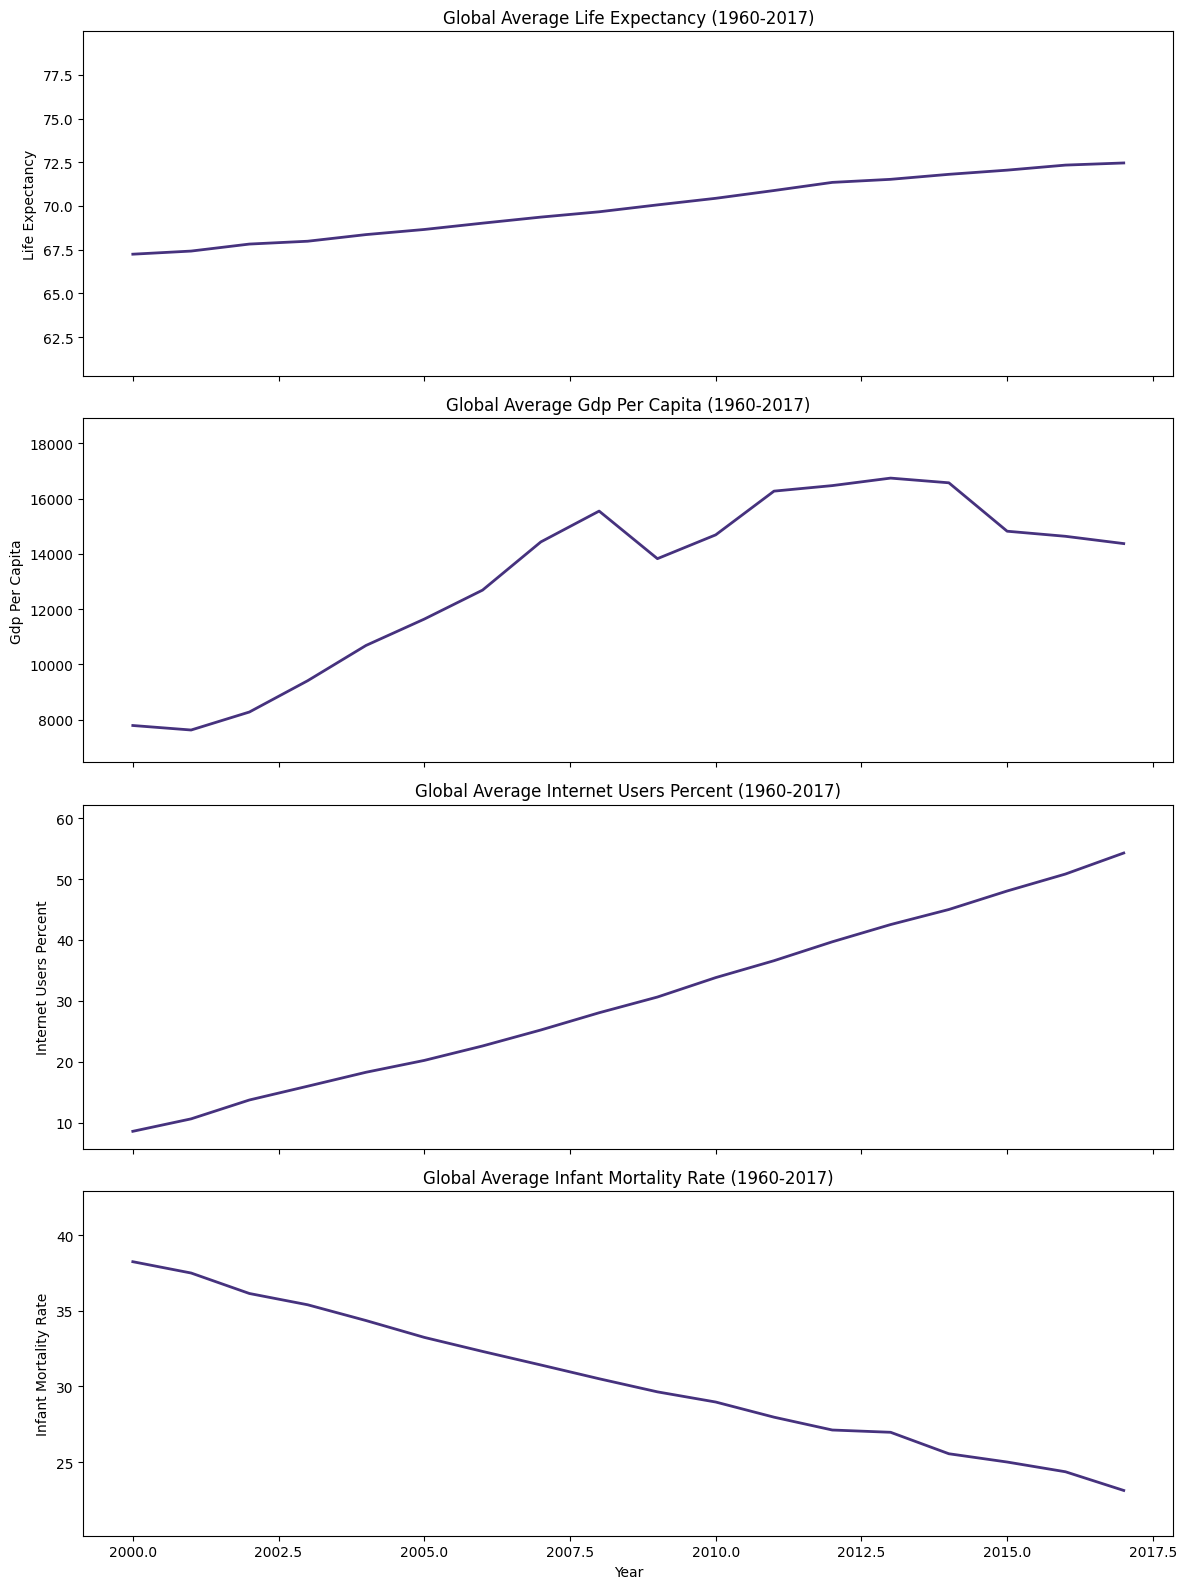

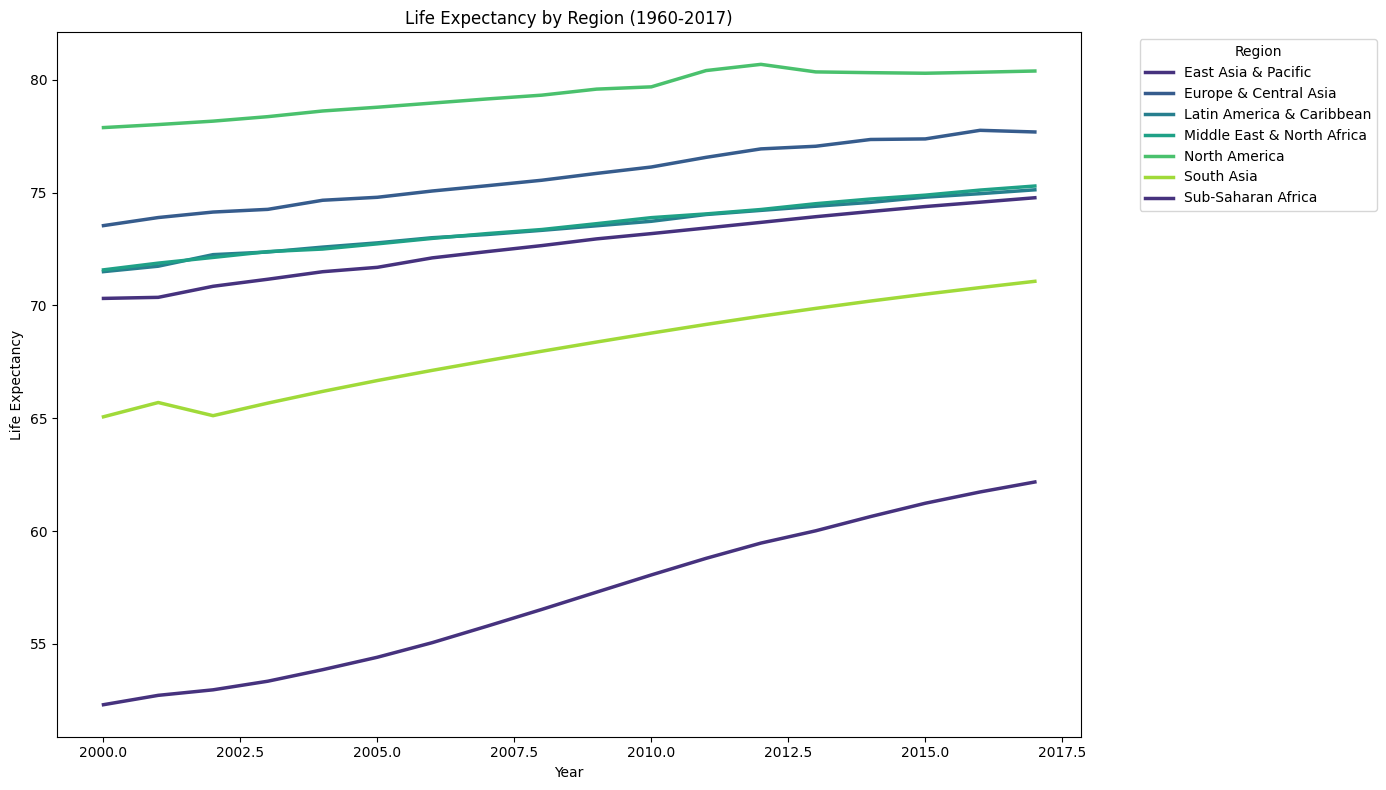

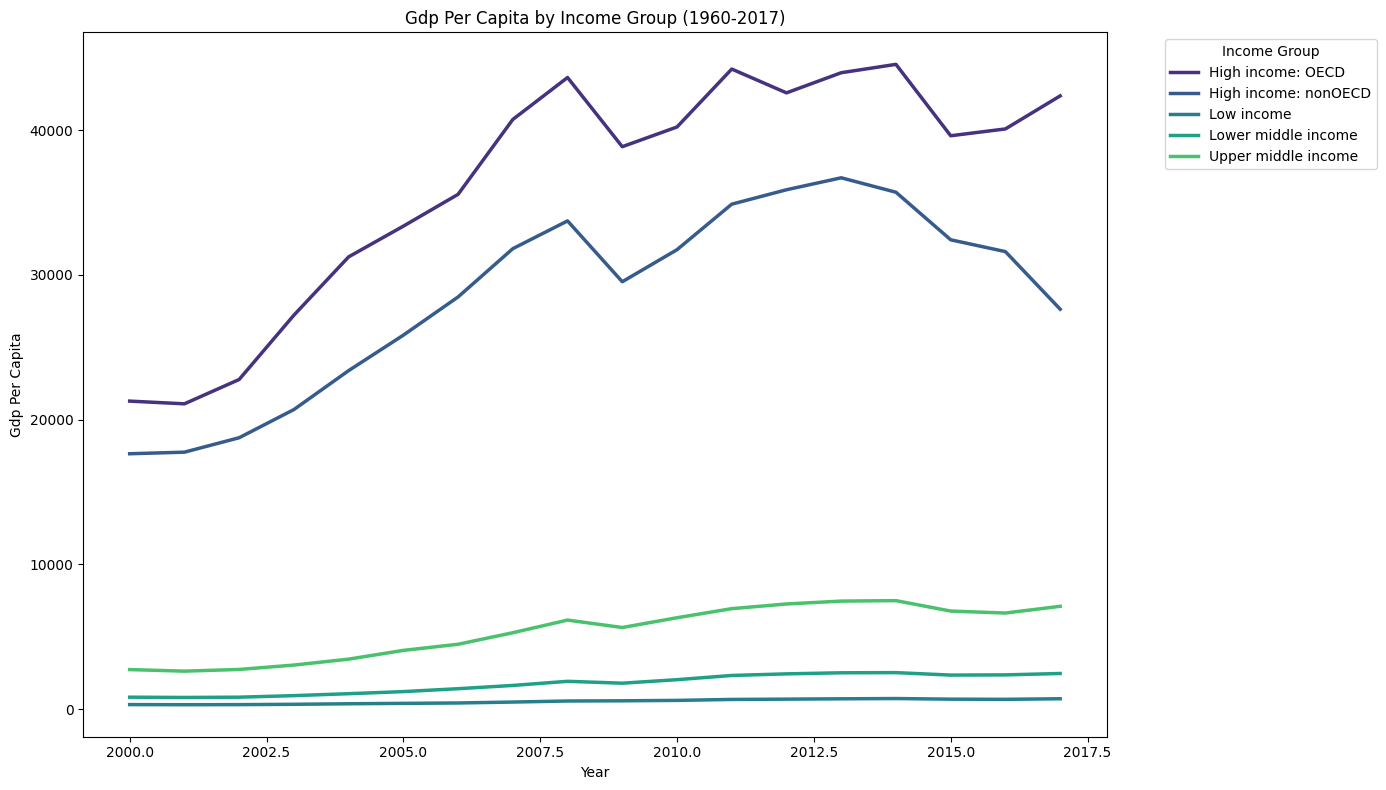

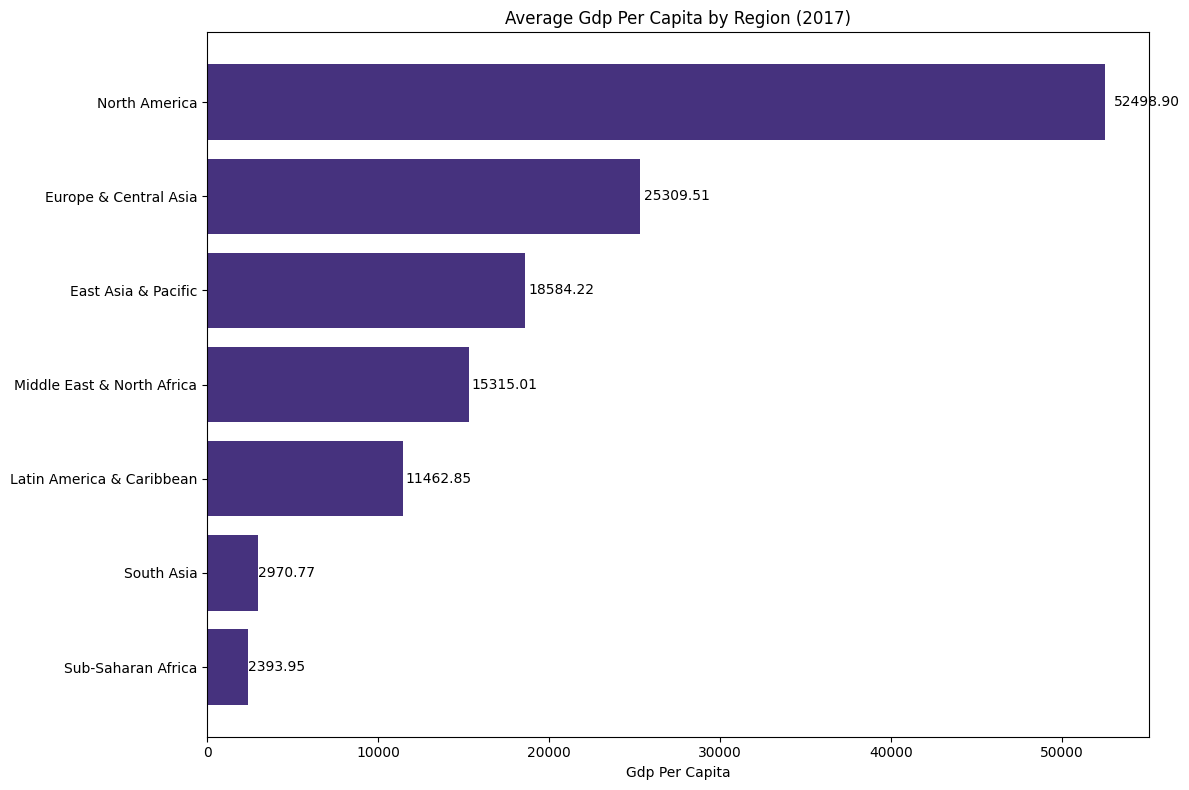

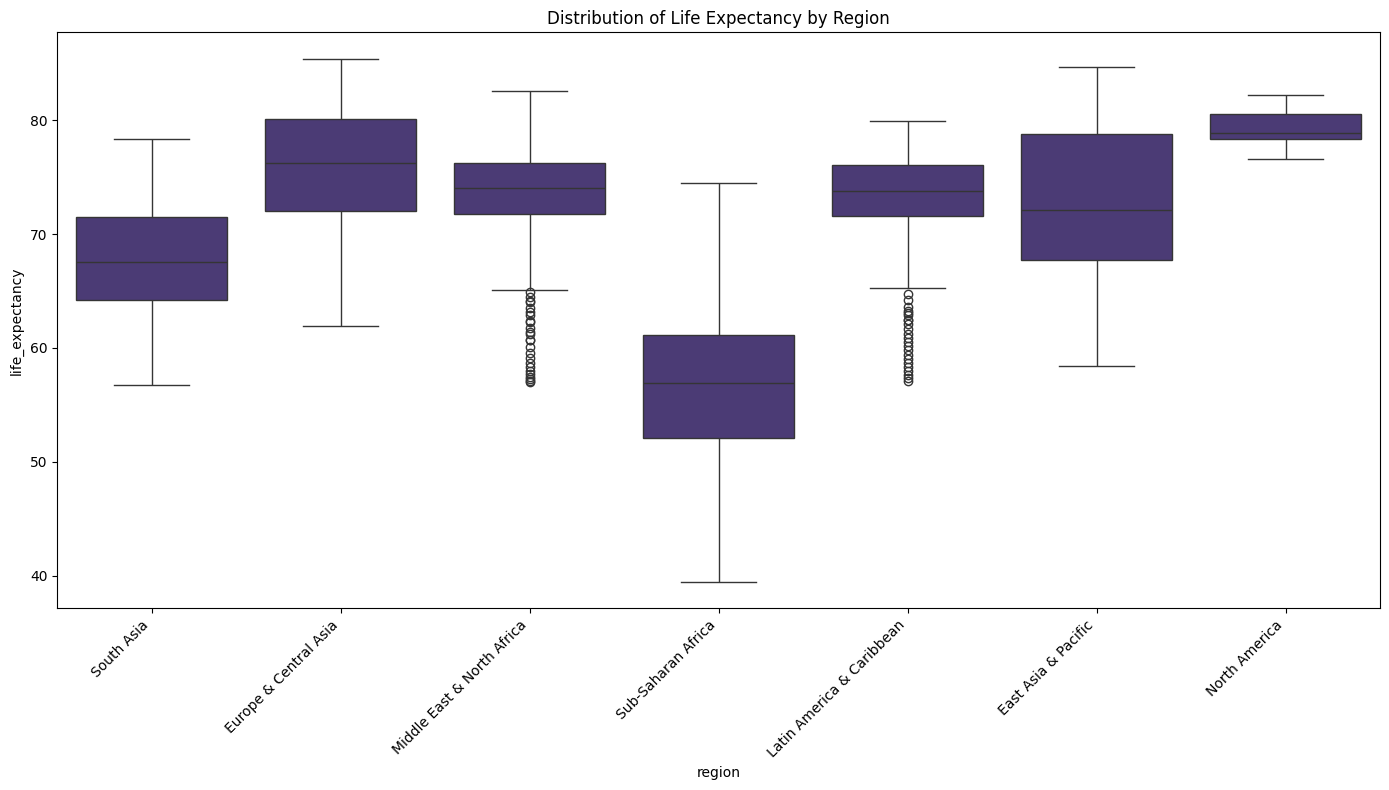

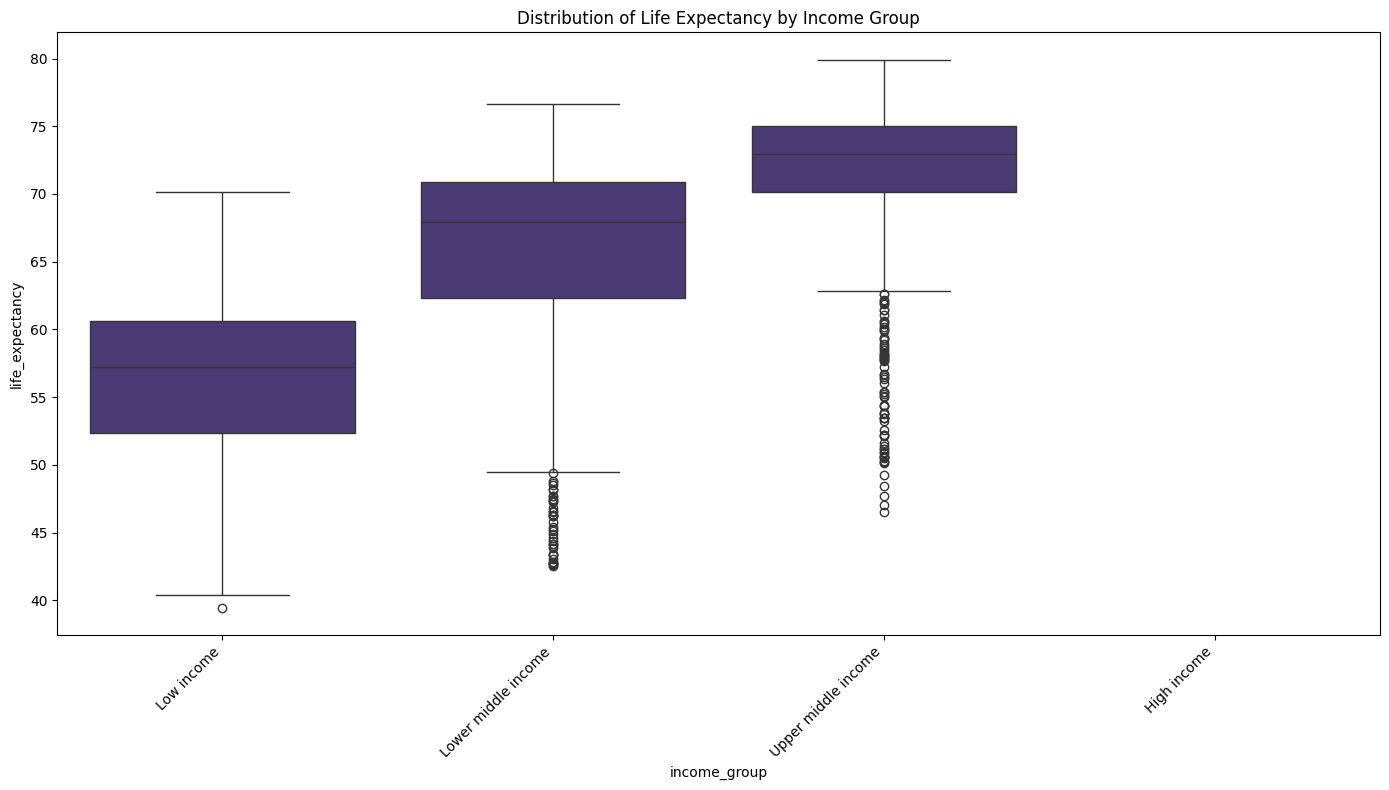

In [ ]:

# Execution
# ----------------
if __name__ == "__main__":
    # Select important metrics to analyze
    key_metrics = [
        'life_expectancy', 
        'gdp_per_capita', 
        'internet_users_percent', 
        'infant_mortality_rate'
    ]
    
    # Plot global trends for key metrics
    global_trends_fig = plot_global_trends(final_cleaned_df, key_metrics)
    global_trends_fig.savefig('global_trends.png', dpi=300, bbox_inches='tight')
    
    # Plot regional trends for life expectancy
    region_le_fig = plot_region_trends(final_cleaned_df, 'life_expectancy')
    region_le_fig.savefig('region_life_expectancy_trends.png', dpi=300, bbox_inches='tight')
    
    # Plot income group trends for GDP per capita
    income_gdp_fig = plot_income_group_trends(final_cleaned_df, 'gdp_per_capita')
    income_gdp_fig.savefig('income_group_gdp_trends.png', dpi=300, bbox_inches='tight')
    
    # Create choropleth map for internet usage in 2017
    internet_map = plot_choropleth(final_cleaned_df, 'internet_users_percent', 2017)
    internet_map.write_html('internet_usage_map_2017.html')
    
    # Regional distribution of GDP per capita in 2017
    gdp_region_fig = plot_regional_distribution(final_cleaned_df, 'gdp_per_capita', 2017)
    gdp_region_fig.savefig('gdp_by_region_2017.png', dpi=300, bbox_inches='tight')
    
    # Generate statistical summaries
    region_summary = summarize_by_region(final_cleaned_df, key_metrics)
    income_summary = summarize_by_income(final_cleaned_df, key_metrics)
    
    # Save summaries to CSV
    region_summary.to_csv('region_metrics_summary.csv')
    income_summary.to_csv('income_group_metrics_summary.csv')
    
    # Create boxplots for life expectancy
    le_region_box = plot_boxplots_by_region(final_cleaned_df, 'life_expectancy')
    le_region_box.savefig('life_expectancy_by_region_boxplot.png', dpi=300, bbox_inches='tight')
    
    le_income_box = plot_boxplots_by_income(final_cleaned_df, 'life_expectancy')
    le_income_box.savefig('life_expectancy_by_income_boxplot.png', dpi=300, bbox_inches='tight')
    
    print("EDA completed successfully!")


### **Relationship Analysis**  





In [40]:

from scipy import stats

# Set the style for matplotlib plots
sns.set_palette("viridis")

# 1. CORRELATION MATRIX
# --------------------

def create_correlation_matrix(df, metrics):
    """Create a correlation matrix for selected metrics."""
    # Select only the numeric columns we're interested in
    data = df[metrics].copy()
    
    # Calculate correlation matrix
    corr_matrix = data.corr()
    
    # Create a heatmap
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    sns.heatmap(
        corr_matrix, 
        mask=mask,
        annot=True,
        fmt='.2f',
        cmap='coolwarm',
        vmin=-1, vmax=1,
        linewidths=0.5,
        cbar_kws={"shrink": .8}
    )
    
    plt.title('Correlation Matrix of Key Metrics', fontsize=16)
    plt.tight_layout()
    return plt.gcf(), corr_matrix

def find_strongest_correlations(corr_matrix, n=10):
    """Find the n strongest correlations (positive or negative) from a correlation matrix."""
    # Convert to 1D series and get absolute values
    corr_series = corr_matrix.unstack()
    corr_series = corr_series[corr_series != 1.0]  # Remove self-correlations
    
    # Sort by absolute value
    strongest = corr_series.abs().sort_values(ascending=False).head(n)
    
    # Return the original values (not absolute)
    return pd.DataFrame({
        'Variable Pair': strongest.index,
        'Correlation': strongest.index.map(lambda x: corr_series[x])
    })


In [41]:

# 2. SCATTER PLOTS
# ---------------

def plot_scatter_with_regression(df, x, y, hue=None, year=None):
    """
    Create a scatter plot with regression line.
    
    Parameters:
    - df: DataFrame
    - x: x-axis variable
    - y: y-axis variable
    - hue: optional categorical variable for color coding
    - year: optional year to filter data
    """
    # Filter data if year is specified
    if year is not None:
        data = df[df['year'] == year].copy()
    else:
        data = df.copy()
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    
    if hue:
        # Create scatter plot with color coding
        sns.scatterplot(x=x, y=y, hue=hue, data=data, alpha=0.7)
        
        # Add regression line for each category
        for category in data[hue].unique():
            subset = data[data[hue] == category]
            if len(subset) > 1:  # Need at least 2 points for regression
                x_vals = subset[x]
                y_vals = subset[y]
                
                # Calculate regression line
                slope, intercept, r_value, p_value, std_err = stats.linregress(x_vals, y_vals)
                
                # Plot regression line
                x_range = np.linspace(x_vals.min(), x_vals.max(), 100)
                plt.plot(x_range, intercept + slope * x_range, '--', 
                         label=f'{category}: y={slope:.2f}x+{intercept:.2f}, R²={r_value**2:.2f}')
    else:
        # Create simple scatter plot
        sns.scatterplot(x=x, y=y, data=data, alpha=0.7)
        
        # Add overall regression line
        x_vals = data[x]
        y_vals = data[y]
        
        # Calculate regression line
        slope, intercept, r_value, p_value, std_err = stats.linregress(x_vals, y_vals)
        
        # Plot regression line
        x_range = np.linspace(x_vals.min(), x_vals.max(), 100)
        plt.plot(x_range, intercept + slope * x_range, 'r--', 
                 label=f'y={slope:.2f}x+{intercept:.2f}, R²={r_value**2:.2f}')
    
    # Add labels and title
    plt.xlabel(x.replace('_', ' ').title())
    plt.ylabel(y.replace('_', ' ').title())
    
    year_str = f" ({year})" if year else ""
    plt.title(f'Relationship between {x.replace("_", " ").title()} and {y.replace("_", " ").title()}{year_str}')
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    return plt.gcf()

def plot_scatter_matrix(df, metrics, year=None):
    """Create an interactive scatter matrix for multiple variables."""
    if year is not None:
        data = df[df['year'] == year].copy()
    else:
        data = df.copy()
    
    # Create readable column names for the visualization
    data_for_plot = data[metrics].copy()
    data_for_plot.columns = [col.replace('_', ' ').title() for col in metrics]
    
    # Add region for color coding
    data_for_plot['Region'] = data['region']
    
    # Create the scatter matrix
    fig = px.scatter_matrix(
        data_for_plot,
        dimensions=data_for_plot.columns[:-1],  # Exclude the Region column
        color='Region',
        opacity=0.7,
        title=f"Scatter Matrix of Key Metrics{' (' + str(year) + ')' if year else ''}"
    )
    
    # Update layout
    fig.update_layout(
        width=1000,
        height=1000,
        plot_bgcolor='white',
        colorway=px.colors.qualitative.G10
    )
    
    return fig


In [42]:

# 3. PAIR PLOTS
# ------------

def create_pair_plot(df, metrics, hue='region', year=None):
    """Create a pair plot for a set of metrics with color coding by category."""
    if year is not None:
        data = df[df['year'] == year].copy()
    else:
        data = df.copy()
    
    # Select only the columns we need
    plot_data = data[metrics + [hue]].copy()
    
    # Create pair plot
    g = sns.pairplot(
        plot_data, 
        hue=hue,
        height=2.5,
        corner=True,
        plot_kws={'alpha': 0.6, 's': 30},
        diag_kws={'alpha': 0.6}
    )
    
    # Customize the plot
    g.fig.suptitle(f'Pair Plot of Key Metrics{" (" + str(year) + ")" if year else ""}', y=1.02, fontsize=16)
    g.fig.subplots_adjust(top=0.95)
    
    return g.fig

def plot_animated_scatter(df, x, y, years=None):
    """Create an animated scatter plot showing how the relationship evolves over time."""
    if years is None:
        years = sorted(df['year'].unique())
    
    # Filter data for selected years
    data = df[df['year'].isin(years)].copy()
    
    # Create the animated scatter plot
    fig = px.scatter(
        data,
        x=x,
        y=y,
        animation_frame='year',
        animation_group='country_code',
        size='population',
        color='region',
        hover_name='country_name',
        log_x=True if x == 'gdp_per_capita' else False,  # Log scale for GDP per capita
        size_max=45,
        range_x=[data[x].min()*0.9, data[x].max()*1.1],
        range_y=[data[y].min()*0.9, data[y].max()*1.1],
        title=f'Relationship between {x.replace("_", " ").title()} and {y.replace("_", " ").title()} (1960-2017)'
    )
    
    # Update layout
    fig.update_layout(
        xaxis_title=x.replace('_', ' ').title(),
        yaxis_title=y.replace('_', ' ').title(),
        coloraxis_colorbar=dict(title='Region'),
        height=600,
        width=900
    )
    
    return fig


Top 10 strongest correlations:
                               Variable Pair  Correlation
0        (life_expectancy, crude_birth_rate)    -0.855313
1        (crude_birth_rate, life_expectancy)    -0.855313
2   (infant_mortality_rate, life_expectancy)    -0.779859
3   (life_expectancy, infant_mortality_rate)    -0.779859
4  (crude_birth_rate, infant_mortality_rate)     0.736121
5  (infant_mortality_rate, crude_birth_rate)     0.736121
6   (internet_users_percent, gdp_per_capita)     0.712833
7   (gdp_per_capita, internet_users_percent)     0.712833
8  (internet_users_percent, life_expectancy)     0.703567
9  (life_expectancy, internet_users_percent)     0.703567
Relationship analysis completed successfully!


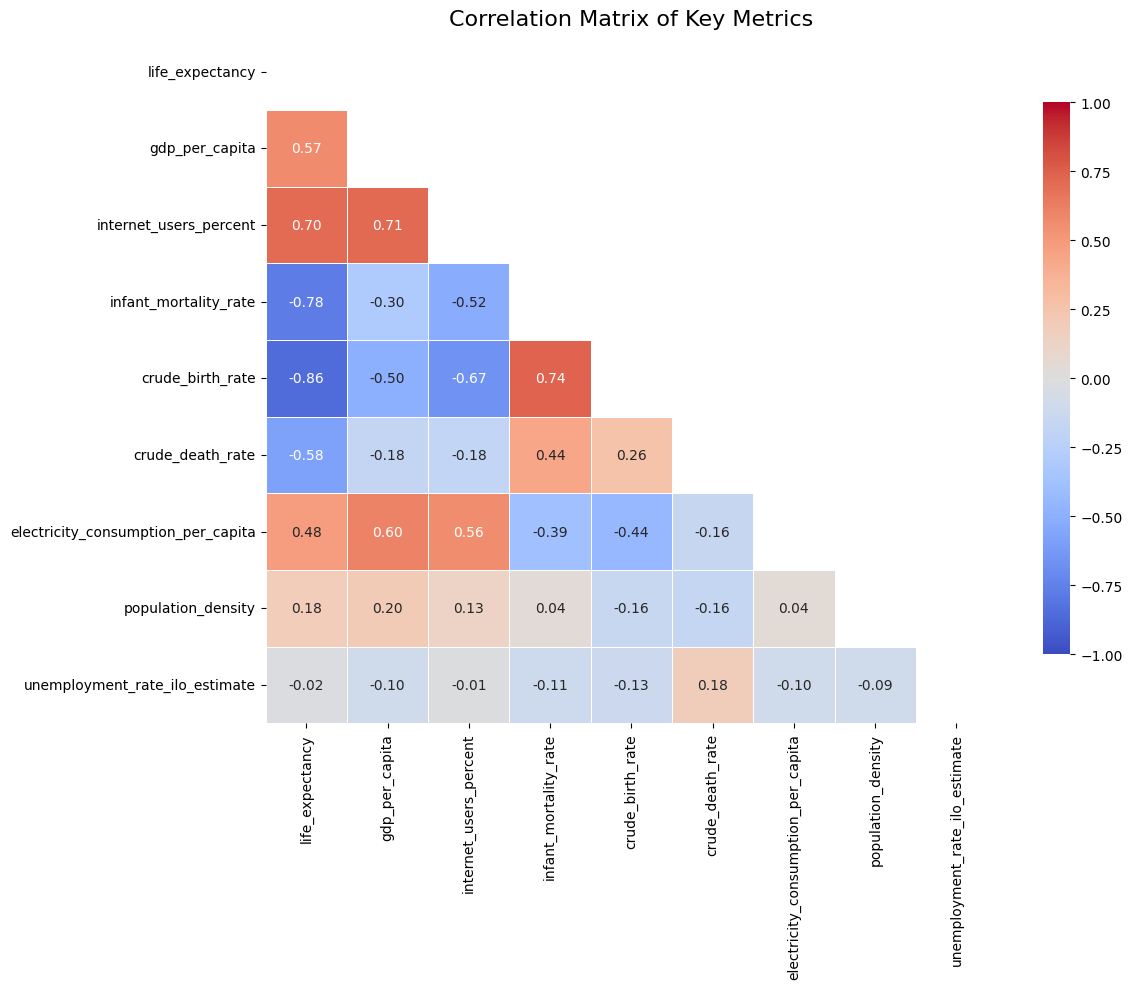

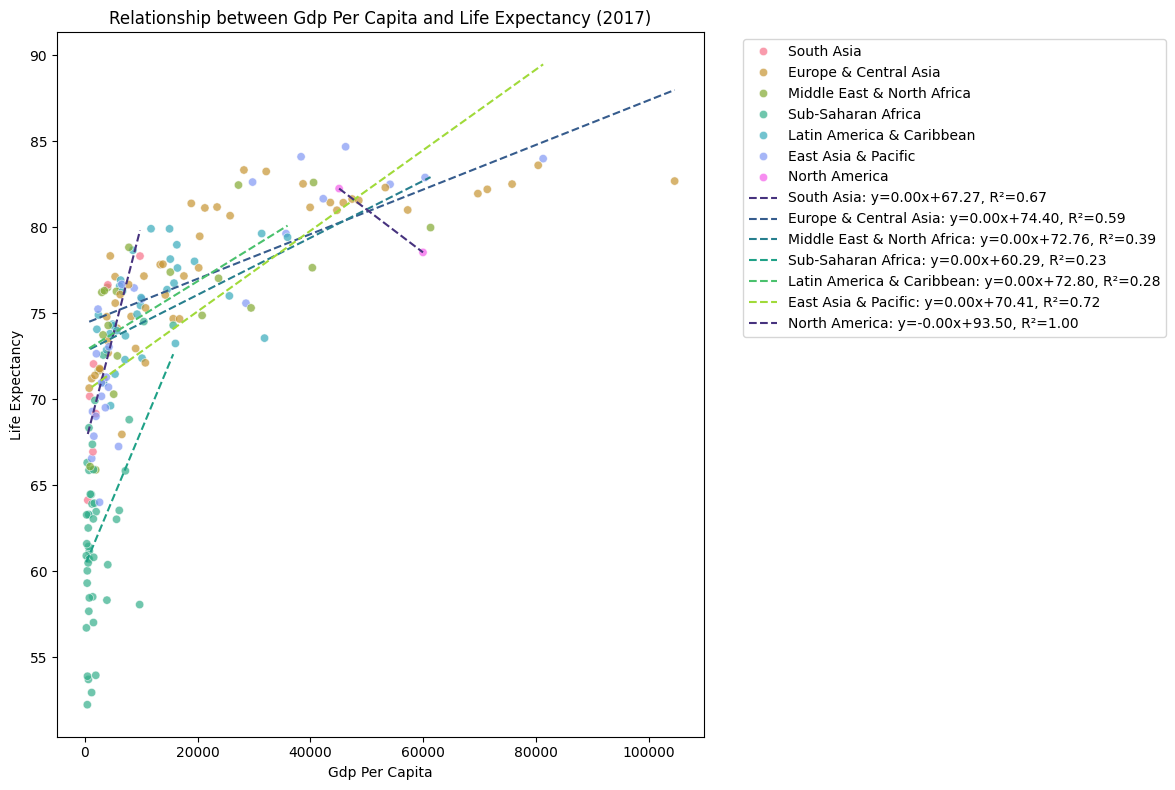

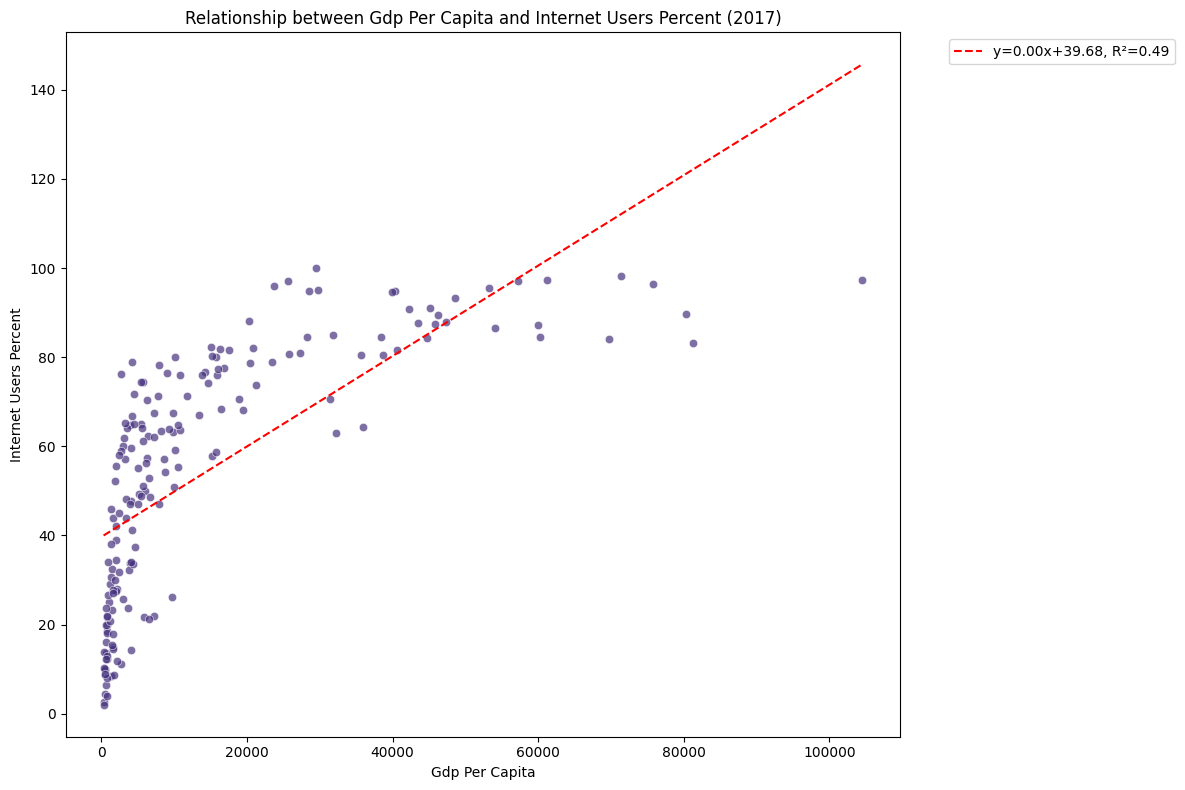

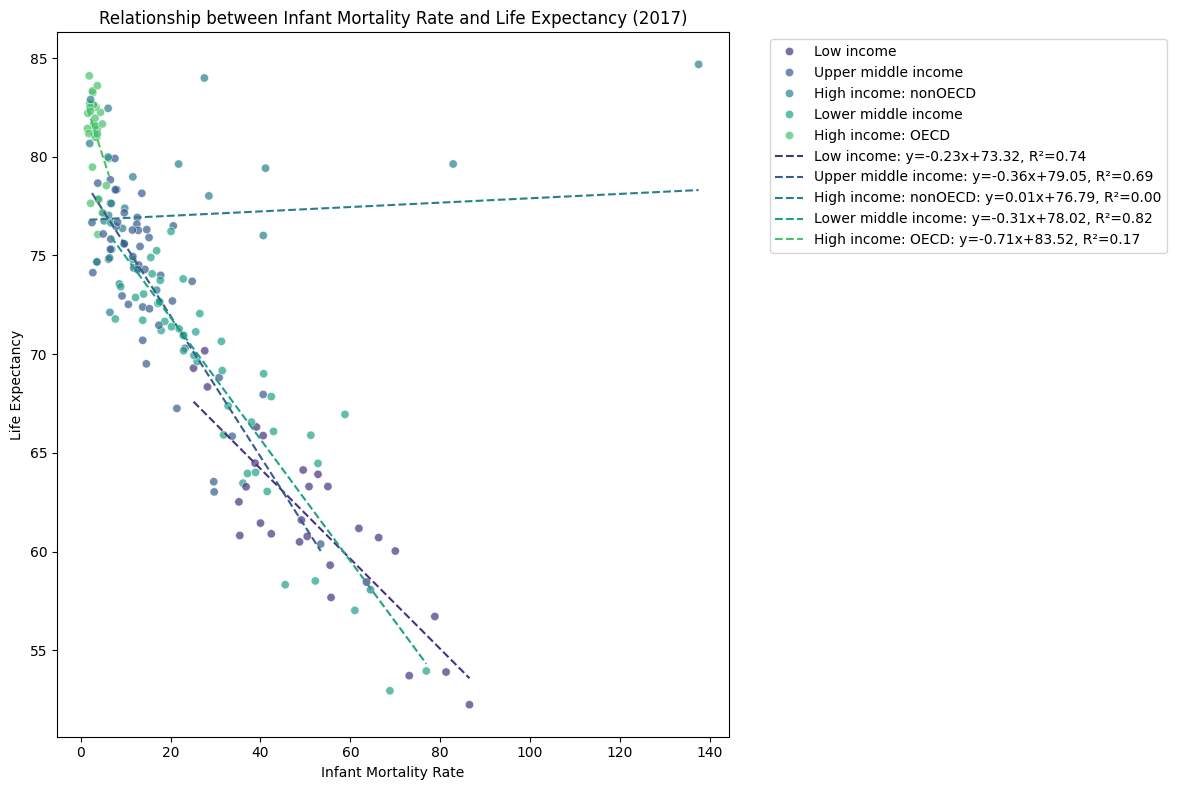

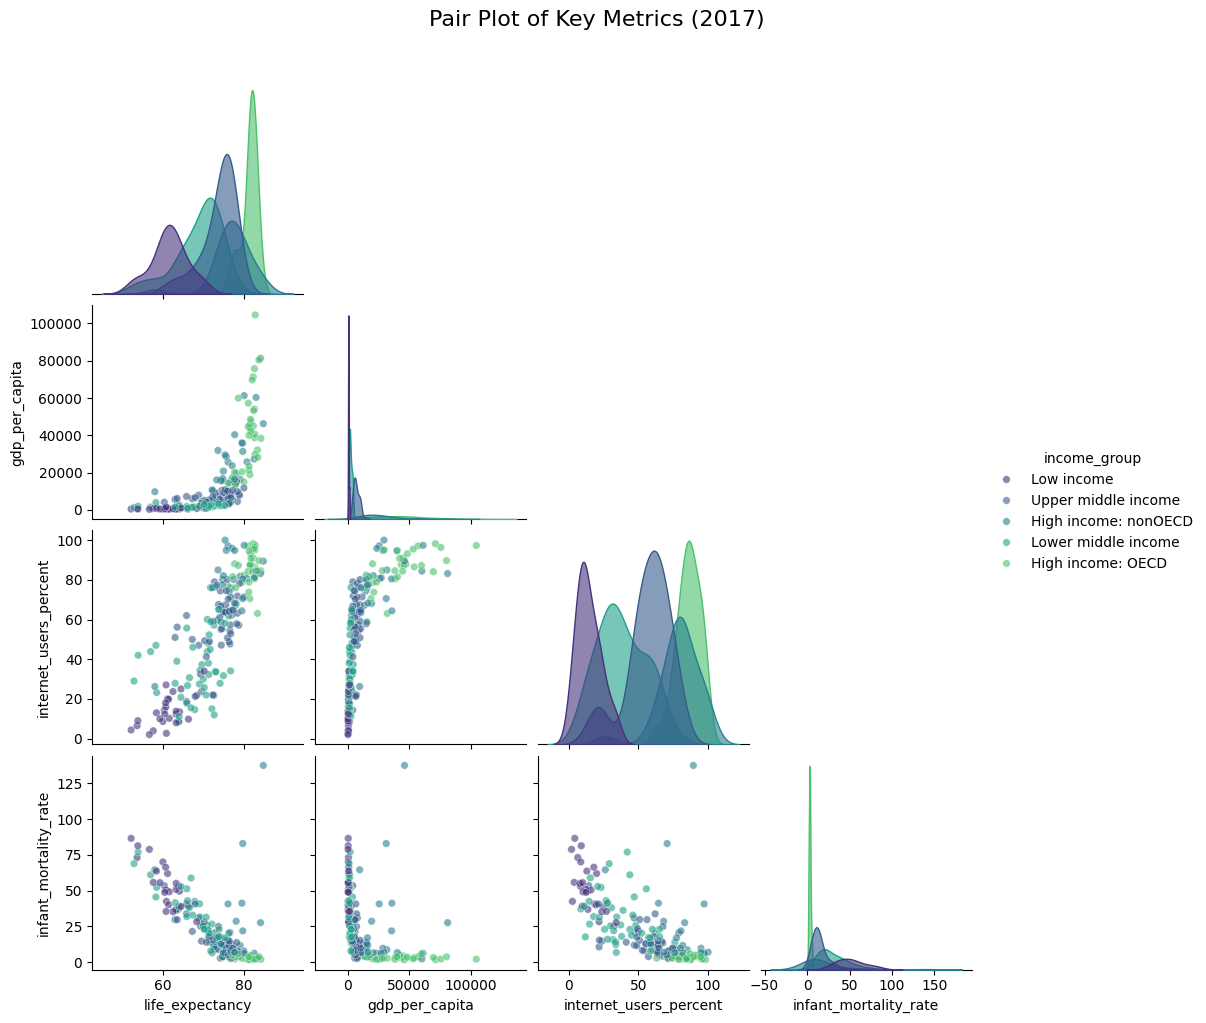

In [43]:

# Execution
# ----------------
if __name__ == "__main__":
    # Select important metrics to analyze
    key_metrics = [
        'life_expectancy', 
        'gdp_per_capita', 
        'internet_users_percent',
        'infant_mortality_rate', 
        'crude_birth_rate',
        'crude_death_rate',
        'electricity_consumption_per_capita',
        'population_density',
        'unemployment_rate_ilo_estimate'
    ]
    
    # 1. Create correlation matrix
    corr_fig, corr_matrix = create_correlation_matrix(final_cleaned_df, key_metrics)
    corr_fig.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
    
    # Find the strongest correlations
    strongest_corrs = find_strongest_correlations(corr_matrix, n=10)
    strongest_corrs.to_csv('strongest_correlations.csv')
    print("Top 10 strongest correlations:")
    print(strongest_corrs)
    
    # 2. Create scatter plots for top correlations
    # Example: Life expectancy vs GDP per capita
    le_gdp_scatter = plot_scatter_with_regression(
        final_cleaned_df, 'gdp_per_capita', 'life_expectancy', hue='region', year=2017
    )
    le_gdp_scatter.savefig('life_expectancy_vs_gdp_scatter.png', dpi=300, bbox_inches='tight')
    
    # Example: Internet users vs GDP per capita
    internet_gdp_scatter = plot_scatter_with_regression(
        final_cleaned_df, 'gdp_per_capita', 'internet_users_percent', year=2017
    )
    internet_gdp_scatter.savefig('internet_vs_gdp_scatter.png', dpi=300, bbox_inches='tight')
    
    # Example: Infant mortality vs life expectancy
    mortality_le_scatter = plot_scatter_with_regression(
        final_cleaned_df, 'infant_mortality_rate', 'life_expectancy', hue='income_group', year=2017
    )
    mortality_le_scatter.savefig('mortality_vs_life_expectancy_scatter.png', dpi=300, bbox_inches='tight')
    
    # 3. Create scatter matrix
    scatter_matrix = plot_scatter_matrix(
        final_cleaned_df, 
        ['life_expectancy', 'gdp_per_capita', 'internet_users_percent', 'infant_mortality_rate'], 
        year=2017
    )
    scatter_matrix.write_html('scatter_matrix_2017.html')
    
    # 4. Create pair plot
    pair_plot = create_pair_plot(
        final_cleaned_df, 
        ['life_expectancy', 'gdp_per_capita', 'internet_users_percent', 'infant_mortality_rate'],
        hue='income_group',
        year=2017
    )
    pair_plot.savefig('pair_plot_2017.png', dpi=300, bbox_inches='tight')
    
    # 5. Create animated scatter plot
    animated_scatter = plot_animated_scatter(
        final_cleaned_df, 'gdp_per_capita', 'life_expectancy', 
        years=[1960, 1970, 1980, 1990, 2000, 2010, 2017]
    )
    animated_scatter.write_html('animated_scatter_gdp_life_expectancy.html')
    
    print("Relationship analysis completed successfully!")


### **Comparative Analysis**




- **Income group comparisons:** Compare metrics across different income groups

In [90]:


# 1. INCOME GROUP COMPARISONS
# --------------------------

def compare_income_groups(df, metric, years=None):
    """
    Compare a metric across different income groups for specified years.
    
    Parameters:
    - df: DataFrame
    - metric: column name of the metric to compare
    - years: list of years to include (if None, uses [1970, 1990, 2017])
    """
    if years is None:
        years = [2000, 2008, 2017]
    
    # Filter data for selected years
    data = df[df['year'].isin(years)].copy()
    
    # Calculate average by income group and year
    grouped = data.groupby(['income_group', 'year'])[metric].mean().reset_index()
    
    # Create a pivot table for easier plotting
    pivot_data = grouped.pivot(index='income_group', columns='year', values=metric)
    
    # Order income groups from low to high
    income_order = ['Low income', 'Lower middle income', 'Upper middle income', 
                    'High income: nonOECD', 'High income: OECD']
    
    # Only include income groups that exist in the data
    income_order = [group for group in income_order if group in pivot_data.index]
    pivot_data = pivot_data.reindex(income_order)
    
    # Create plot
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Plot bars
    bar_width = 0.2
    positions = np.arange(len(pivot_data.index))
    
    for i, year in enumerate(years):
        offset = (i - len(years)/2 + 0.5) * bar_width
        bars = ax.bar(positions + offset, pivot_data[year], width=bar_width, 
                      label=str(year), alpha=0.8)
        
        # Add value labels on top of bars
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.01*max(pivot_data.max()),
                    f'{height:.1f}', ha='center', va='bottom', fontsize=9)
    
    # Customize plot
    ax.set_xticks(positions)
    ax.set_xticklabels(pivot_data.index, rotation=45, ha='right')
    ax.set_ylabel(metric.replace('_', ' ').title())
    ax.set_title(f'Comparison of {metric.replace("_", " ").title()} Across Income Groups')
    ax.legend(title='Year')
    
    plt.tight_layout()
    return fig

def plot_income_gap_over_time(df, metric):
    """
    Plot the gap between high and low income countries for a metric over time.
    
    Parameters:
    - df: DataFrame
    - metric: column name of the metric to analyze
    """
    # Calculate yearly average for high OECD and low income groups
    high_income = df[df['income_group'] == 'High income: OECD'].groupby('year')[metric].mean()
    low_income = df[df['income_group'] == 'Low income'].groupby('year')[metric].mean()
    
    # Ensure both series have the same years
    common_years = high_income.index.intersection(low_income.index)
    high_income = high_income[common_years]
    low_income = low_income[common_years]
    
    # Calculate the gap
    gap = high_income - low_income
    
    # Create plot
    plt.figure(figsize=(14, 8))
    
    # Plot the values for each income group
    plt.plot(high_income.index, high_income.values, 'b-', linewidth=2, label='High income: OECD')
    plt.plot(low_income.index, low_income.values, 'g-', linewidth=2, label='Low income')
    
    # Fill the gap area
    plt.fill_between(high_income.index, high_income.values, low_income.values, 
                     color='lightgray', alpha=0.5, label='Gap')
    
    # Add labels and title
    plt.xlabel('Year')
    plt.ylabel(metric.replace('_', ' ').title())
    plt.title(f'Gap in {metric.replace("_", " ").title()} Between High Income OECD and Low Income Countries')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return plt.gcf()

def compare_oecd_vs_nonoecd(df, metric, years=None):
    """
    Compare a metric between OECD and non-OECD high income countries.
    
    Parameters:
    - df: DataFrame
    - metric: column name of the metric to compare
    - years: list of years to include (if None, uses [2000, 2008, 2017])
    """
    if years is None:
        years = [2000, 2008, 2017]
    
    # Filter data for selected years and high income groups
    data = df[df['year'].isin(years) & 
              df['income_group'].isin(['High income: OECD', 'High income: nonOECD'])].copy()
    
    # Calculate average by income group and year
    grouped = data.groupby(['income_group', 'year'])[metric].mean().reset_index()
    
    # Create a pivot table for easier plotting
    pivot_data = grouped.pivot(index='income_group', columns='year', values=metric)
    
    # Create plot
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot bars
    bar_width = 0.2
    positions = np.arange(len(pivot_data.index))
    
    for i, year in enumerate(years):
        offset = (i - len(years)/2 + 0.5) * bar_width
        bars = ax.bar(positions + offset, pivot_data[year], width=bar_width, 
                      label=str(year), alpha=0.8)
        
        # Add value labels on top of bars
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.01*max(pivot_data.max()),
                    f'{height:.1f}', ha='center', va='bottom', fontsize=9)
    
    # Customize plot
    ax.set_xticks(positions)
    ax.set_xticklabels(pivot_data.index, rotation=0)
    ax.set_ylabel(metric.replace('_', ' ').title())
    ax.set_title(f'Comparison of {metric.replace("_", " ").title()} Between OECD and Non-OECD High Income Countries')
    ax.legend(title='Year')
    
    plt.tight_layout()
    return fig


- **Regional comparisons:** Analyze differences between regions

In [91]:

# 2. REGIONAL COMPARISONS
# ---------------------

def compare_regions(df, metric, years=None):
    """
    Compare a metric across different regions for specified years.
    
    Parameters:
    - df: DataFrame
    - metric: column name of the metric to compare
    - years: list of years to include (if None, uses [2000, 2008, 2017])
    """
    if years is None:
        years = [2000, 2008, 2017]
    
    # Filter data for selected years
    data = df[df['year'].isin(years)].copy()
    
    # Calculate average by region and year
    grouped = data.groupby(['region', 'year'])[metric].mean().reset_index()
    
    # Create a pivot table for easier plotting
    pivot_data = grouped.pivot(index='region', columns='year', values=metric)
    
    # Sort regions by the most recent year's values
    pivot_data = pivot_data.sort_values(by=years[-1])
    
    # Create plot
    fig = plt.figure(figsize=(14, 10))
    
    # Plot horizontal bars
    bar_width = 0.2
    positions = np.arange(len(pivot_data.index))
    
    for i, year in enumerate(years):
        offset = (i - len(years)/2 + 0.5) * bar_width
        bars = plt.barh(positions + offset, pivot_data[year], height=bar_width, 
                        label=str(year), alpha=0.8)
        
        # Add value labels at the end of bars
        for bar in bars:
            width = bar.get_width()
            plt.text(width * 1.01, bar.get_y() + bar.get_height()/2.,
                     f'{width:.1f}', ha='left', va='center', fontsize=9)
    
    # Customize plot
    plt.yticks(positions, pivot_data.index)
    plt.xlabel(metric.replace('_', ' ').title())
    plt.title(f'Comparison of {metric.replace("_", " ").title()} Across Regions')
    plt.legend(title='Year')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig

def plot_regional_radar(df, metrics, year=2017):
    """
    Create a radar chart comparing regions across multiple metrics.
    
    Parameters:
    - df: DataFrame
    - metrics: list of metrics to compare
    - year: year to analyze
    """
    # Filter data for the specified year
    data = df[df['year'] == year].copy()
    
    # Calculate average for each metric by region
    region_avg = data.groupby('region')[metrics].mean()
    
    # Normalize the data to a 0-1 scale for each metric
    normalized = pd.DataFrame()
    for metric in metrics:
        min_val = region_avg[metric].min()
        max_val = region_avg[metric].max()
        normalized[metric] = (region_avg[metric] - min_val) / (max_val - min_val)
    
    # For metrics where lower is better (e.g., mortality rates), invert the scale
    inverse_metrics = ['infant_mortality_rate', 'crude_death_rate', 'unemployment_rate_ilo_estimate']
    for metric in inverse_metrics:
        if metric in metrics:
            normalized[metric] = 1 - normalized[metric]
    
    # Create radar chart
    fig = go.Figure()
    
    # Add a trace for each region
    for region in normalized.index:
        fig.add_trace(go.Scatterpolar(
            r=normalized.loc[region].values,
            theta=[m.replace('_', ' ').title() for m in metrics],
            fill='toself',
            name=region
        ))
    
    # Update layout
    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 1]
            )
        ),
        showlegend=True,
        title=f'Regional Comparison Across Multiple Metrics ({year})'
    )
    
    return fig


- **Development indicators:** Composite indicators to compare development levels

In [92]:

# 3. DEVELOPMENT INDICATORS
# -----------------------

def create_development_index(df, metrics, weights=None, year=2017):
    """
    Create a composite development index based on multiple metrics.
    
    Parameters:
    - df: DataFrame
    - metrics: list of metrics to include in the index
    - weights: dict of weights for each metric (if None, equal weights are used)
    - year: year to analyze
    
    Returns:
    - DataFrame with country, region, income_group, and development_index
    """
    # Filter data for the specified year
    data = df[df['year'] == year].copy()
    
    # Select relevant columns
    data_subset = data[['country_name', 'country_code', 'region', 'income_group'] + metrics].copy()
    
    # Handle metrics where lower is better (invert them)
    inverse_metrics = ['infant_mortality_rate', 'crude_death_rate', 'unemployment_rate_ilo_estimate']
    for metric in inverse_metrics:
        if metric in metrics:
            max_val = data_subset[metric].max()
            data_subset[metric] = max_val - data_subset[metric]
    
    # Normalize each metric to 0-1 scale
    normalized = data_subset.copy()
    for metric in metrics:
        min_val = data_subset[metric].min()
        max_val = data_subset[metric].max()
        normalized[metric] = (data_subset[metric] - min_val) / (max_val - min_val)
    
    # Apply weights
    if weights is None:
        # Equal weights
        weights = {metric: 1/len(metrics) for metric in metrics}
    
    # Calculate weighted sum
    normalized['development_index'] = 0
    for metric in metrics:
        normalized['development_index'] += normalized[metric] * weights[metric]
    
    # Sort by development index
    result = normalized[['country_name', 'country_code', 'region', 'income_group', 'development_index']]
    result = result.sort_values('development_index', ascending=False)
    
    return result

def plot_development_index(dev_index_df, top_n=20):
    """
    Plot the top N countries by development index.
    
    Parameters:
    - dev_index_df: DataFrame with development index
    - top_n: number of top countries to show
    """
    # Get top N countries
    top_countries = dev_index_df.head(top_n)
    
    # Create bar chart
    plt.figure(figsize=(14, 10))
    
    # Plot bars colored by income group
    bars = plt.barh(top_countries['country_name'], top_countries['development_index'])
    
    # Color bars by income group
    income_groups = top_countries['income_group'].unique()
    income_colors = plt.cm.tab10(np.linspace(0, 1, len(income_groups)))
    income_color_map = dict(zip(income_groups, income_colors))
    
    for i, bar in enumerate(bars):
        bar.set_color(income_color_map[top_countries.iloc[i]['income_group']])
    
    # Add value labels at the end of bars
    for bar in bars:
        width = bar.get_width()
        plt.text(width * 1.01, bar.get_y() + bar.get_height()/2.,
                 f'{width:.3f}', ha='left', va='center')
    
    # Add legend for income groups
    for income_group, color in income_color_map.items():
        plt.plot([], [], color=color, label=income_group, linewidth=8)
    
    plt.legend(title='Income Group', loc='lower right')
    
    # Customize plot
    plt.xlabel('Development Index')
    plt.title(f'Top {top_n} Countries by Development Index')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    return plt.gcf()


Comparative analysis completed successfully!


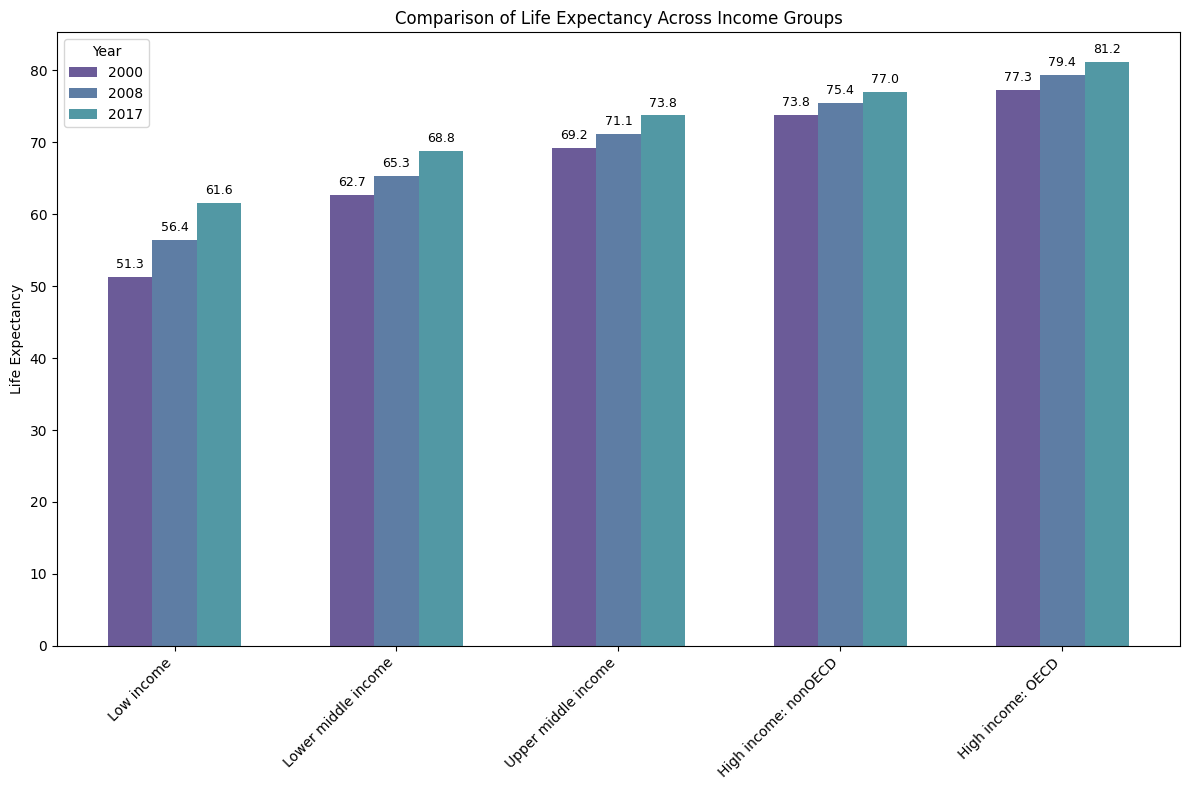

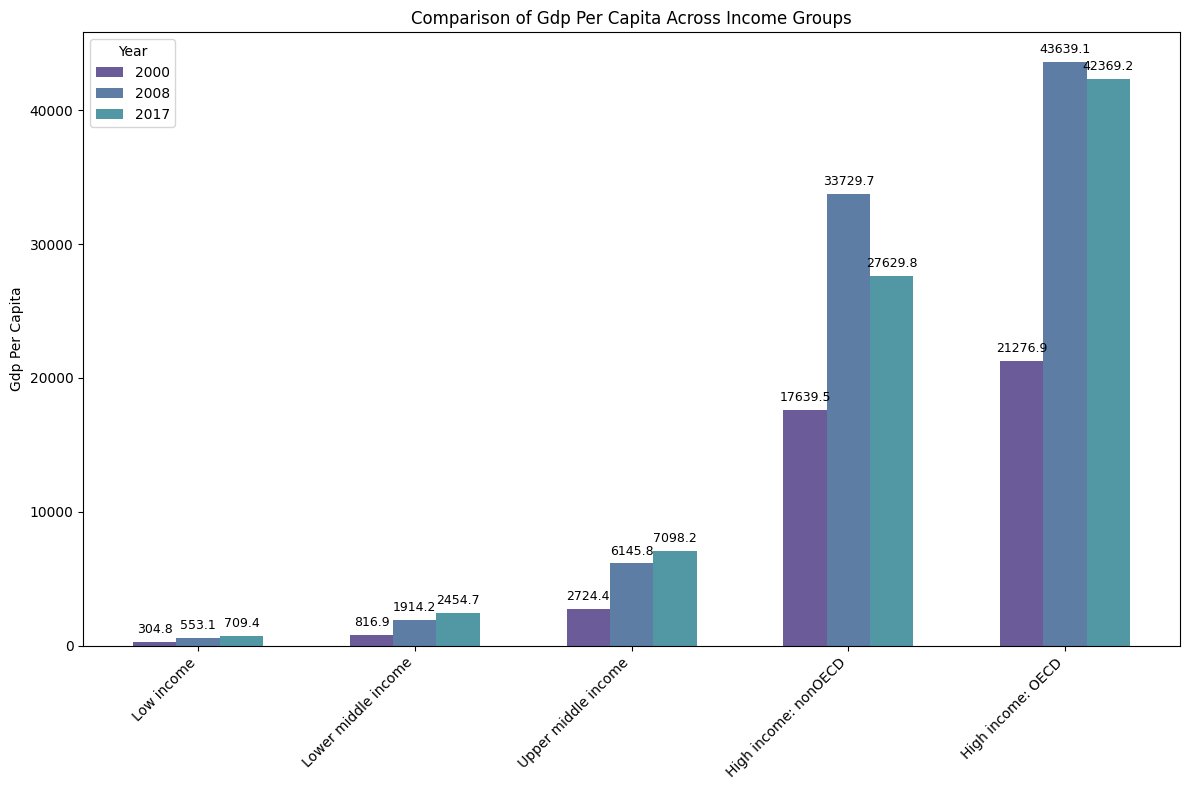

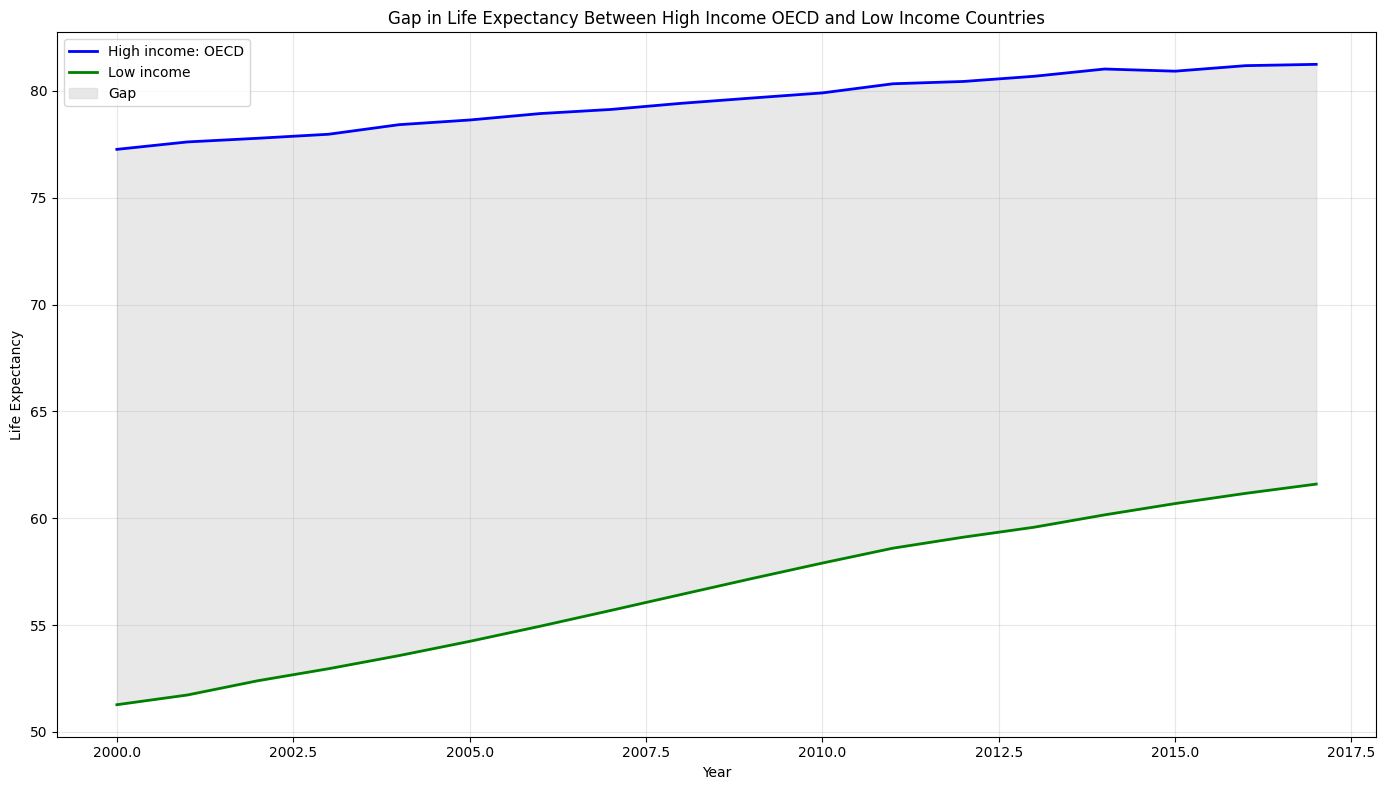

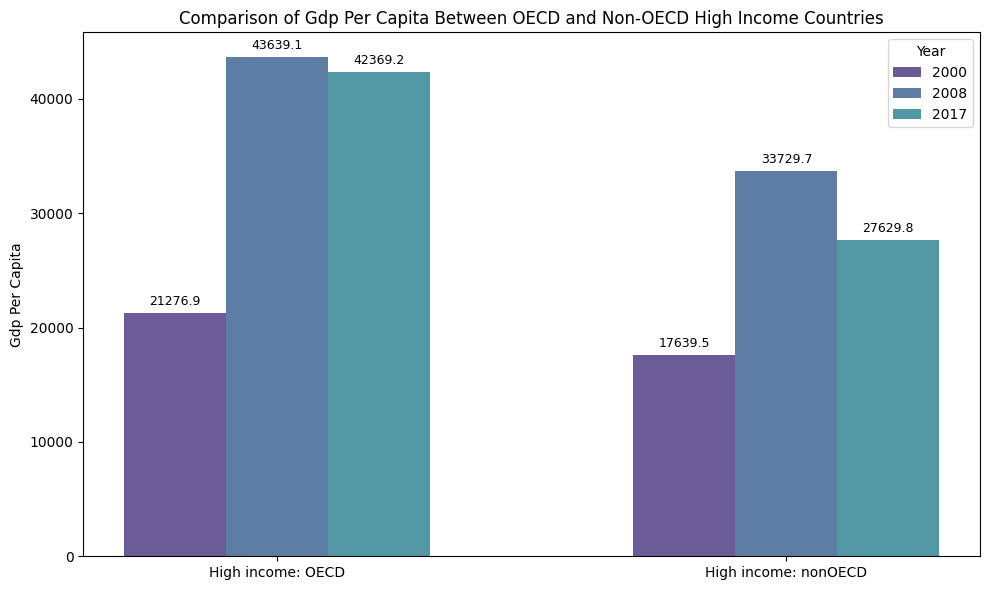

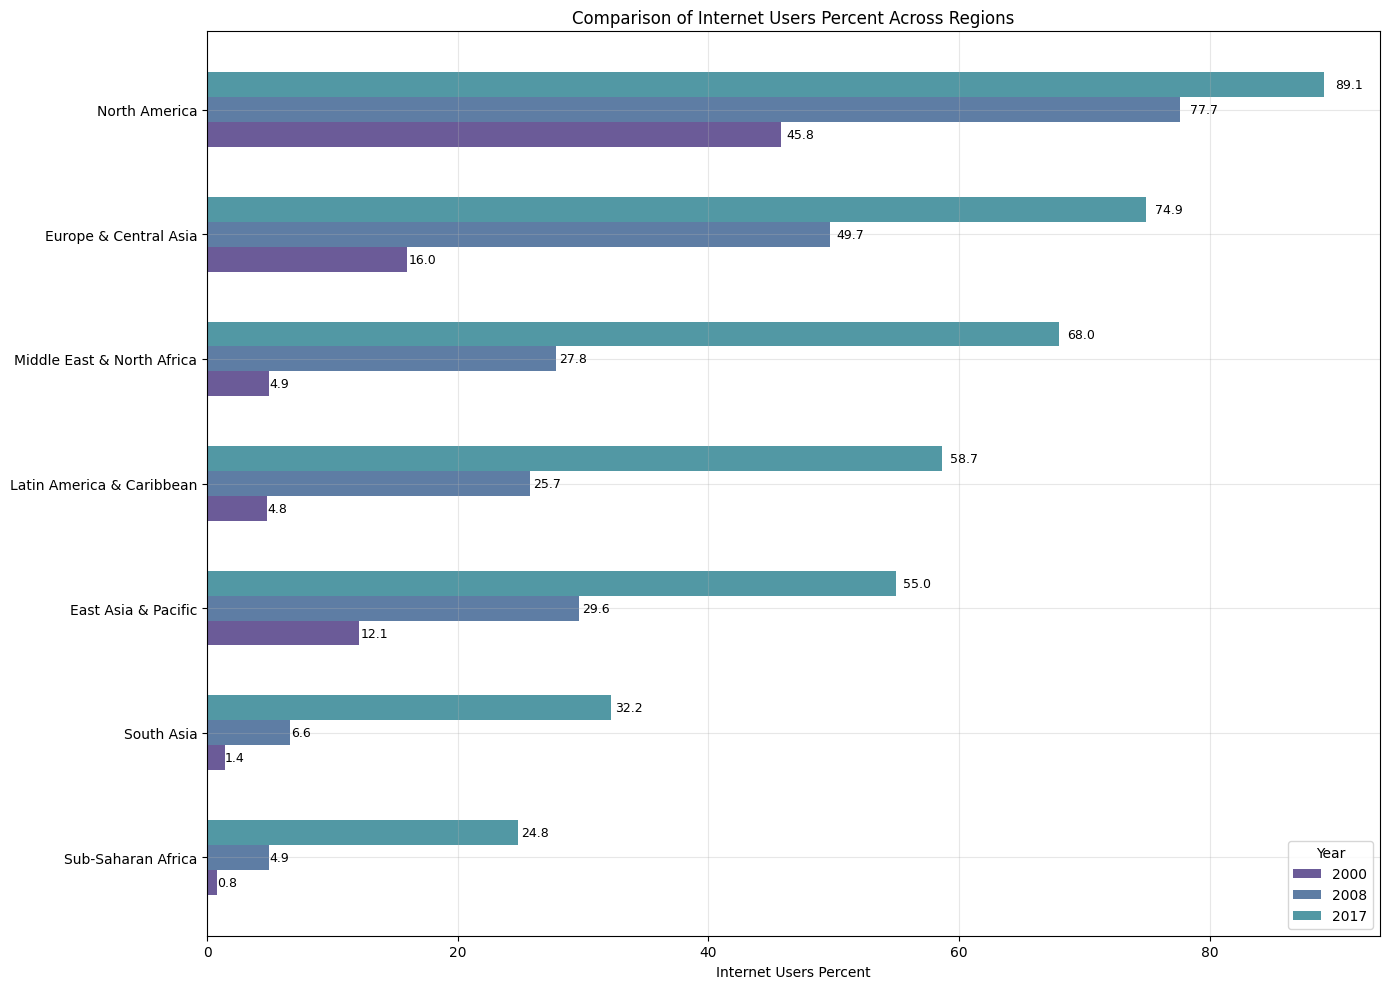

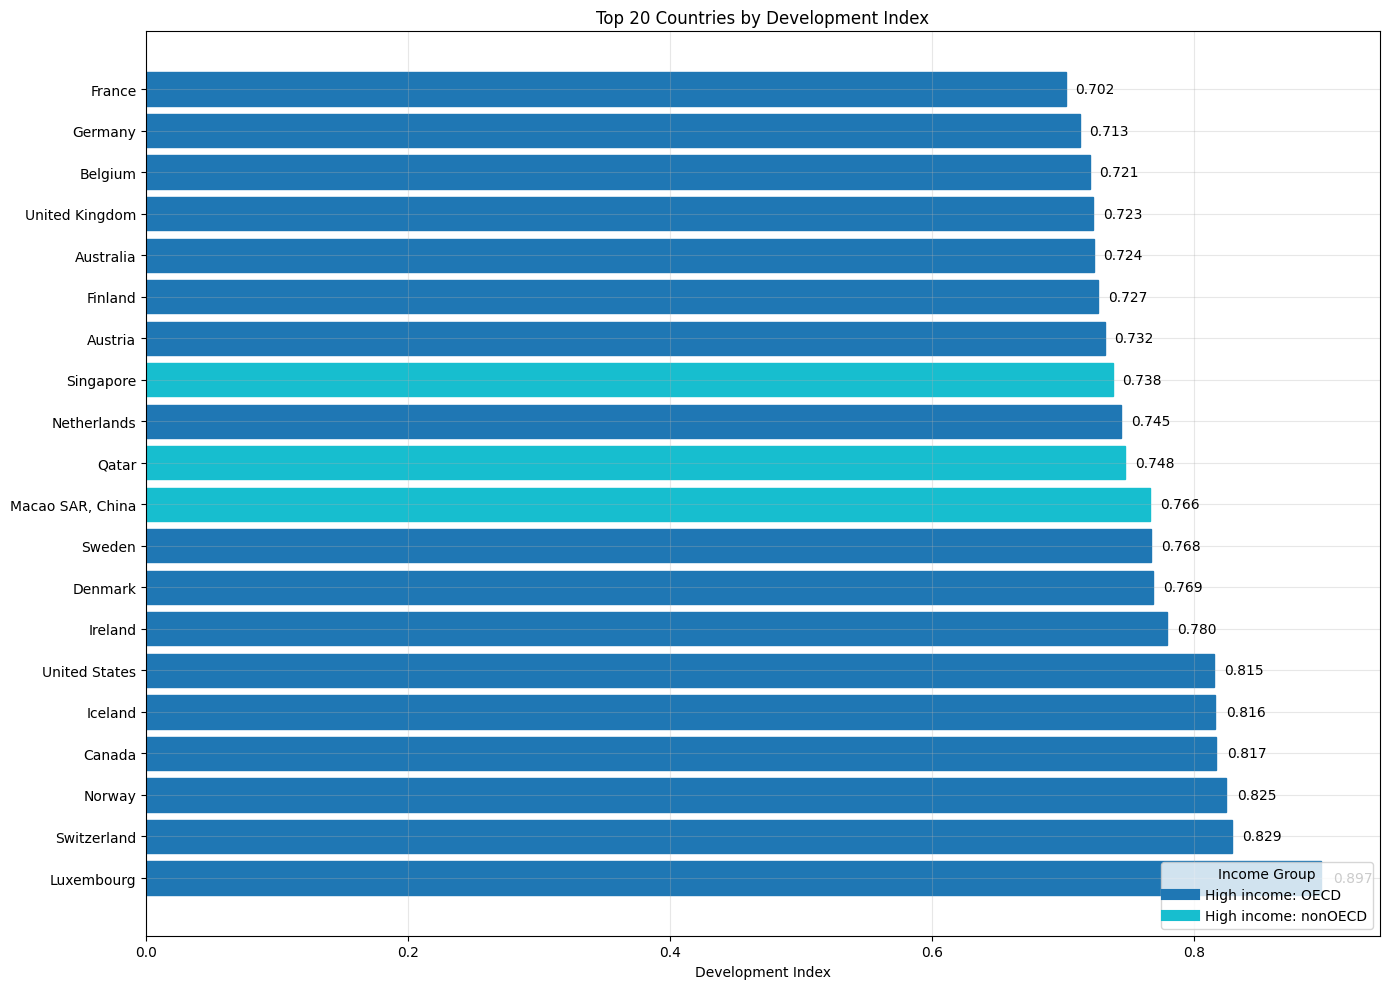

In [93]:

# Execution
# ----------------
if __name__ == "__main__":
    # Select key metrics for analysis
    key_metrics = [
        'life_expectancy', 
        'gdp_per_capita', 
        'internet_users_percent', 
        'infant_mortality_rate'
    ]
    
    # 1. Income Group Comparisons
    # Compare life expectancy across income groups
    income_le_fig = compare_income_groups(final_cleaned_df, 'life_expectancy')
    income_le_fig.savefig('life_expectancy_by_income.png', dpi=300, bbox_inches='tight')
    
    # Compare GDP per capita across income groups
    income_gdp_fig = compare_income_groups(final_cleaned_df, 'gdp_per_capita')
    income_gdp_fig.savefig('gdp_per_capita_by_income.png', dpi=300, bbox_inches='tight')
    
    # Plot the gap in life expectancy between high OECD and low income countries
    gap_le_fig = plot_income_gap_over_time(final_cleaned_df, 'life_expectancy')
    gap_le_fig.savefig('life_expectancy_income_gap.png', dpi=300, bbox_inches='tight')
    
    # Compare OECD vs non-OECD high income countries
    oecd_comparison = compare_oecd_vs_nonoecd(final_cleaned_df, 'gdp_per_capita')
    oecd_comparison.savefig('oecd_vs_nonoecd_gdp.png', dpi=300, bbox_inches='tight')
    
    # 2. Regional Comparisons
    # Compare internet usage across regions
    region_internet_fig = compare_regions(final_cleaned_df, 'internet_users_percent')
    region_internet_fig.savefig('internet_users_by_region.png', dpi=300, bbox_inches='tight')
    
    # Create radar chart for regional comparison
    radar_metrics = [
        'life_expectancy', 
        'gdp_per_capita', 
        'internet_users_percent', 
        'infant_mortality_rate',
        'crude_birth_rate',
        'electricity_consumption_per_capita'
    ]
    radar_fig = plot_regional_radar(final_cleaned_df, radar_metrics)
    radar_fig.write_html('regional_radar_chart.html')
    
    # 3. Development Indicators
    # Create a composite development index
    dev_metrics = [
        'life_expectancy', 
        'gdp_per_capita', 
        'internet_users_percent', 
        'infant_mortality_rate',
        'electricity_consumption_per_capita'
    ]
    
    # Define weights for the development index
    weights = {
        'life_expectancy': 0.25,
        'gdp_per_capita': 0.25,
        'internet_users_percent': 0.2,
        'infant_mortality_rate': 0.15,
        'electricity_consumption_per_capita': 0.15
    }
    
    # Calculate development index
    dev_index = create_development_index(final_cleaned_df, dev_metrics, weights)
    dev_index.to_csv('development_index.csv')
    
    # Plot top countries by development index (colored by income group)
    top_countries_fig = plot_development_index(dev_index)
    top_countries_fig.savefig('top_countries_by_development.png', dpi=300, bbox_inches='tight')
    
    print("Comparative analysis completed successfully!")


## **🔑 Key Insights**  
_Summary of findings and their implications._  

- **Economic Growth Drivers:** _E.g., Technology, trade liberalization._  
- **Challenges:** _E.g., Climate change, income inequality._  
- **Future Directions:** _E.g., Policy recommendations or areas for further study._  

---
